<div class="alert alert-block alert-info">
    <b>Projet 4 | Anticipez les besoins en consommation électrique de bâtiments<br>
    Partie 2 |  Modélisation des données et évaluation des performances</b>
</div>

# 0 | Paramétrer le notebook

On réinitialise les variables du notebook :

In [1]:
%reset -f

## 0.1 | Import des packages et fonctions nécessaires

In [2]:
# Installation de nouveau packages nécessaires:
%pip install joblib

# Import des différents packages et fonctions nécessaires au projet:

# modules classiques d'analyse exploratoire:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# équivaut à charger numpy et matplotlib
# %pylab inline 

# Manipulation fichiers et Interaction avec l'os / notebook
import warnings
import os
import tarfile

# Manipulations temporelles
import time
import timeit
from datetime import timedelta

# fonctions mathématiques
from math import exp

# Feature engineering et modélisation
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import svm

# sauvegarde
import joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
valueTobeRemoved = 'builtins'
import types
# Fonction qui liste les packages chargés
def imports():
    for name, val in globals().items():
        try:
            if isinstance(val, types.ModuleType):
                yield val.__name__
        except:
            continue
            
package_list = list(imports())
package_list = [value for value in package_list if value != valueTobeRemoved]

In [4]:
print("package : version")
print("-"*28)

for p in package_list:
    try:
        print(p, " : ", eval(f"version('{p}')"))
    except:
        continue

package : version
----------------------------


## 0.3 | Mise en page et réglages divers du notebook

In [5]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

#Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

#Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# 1 | Télécharger la donnée nettoyée

## 1.1 | Automatiser la récupération du fichier

Chargement du **contenu du fichier data_cleaned.csv** via la fonction **load_data**:

In [6]:
def load_data():
    data = pd.read_pickle('data_cleaned.pkl')
    data_cat = pd.read_pickle('data_cat.pkl').values.tolist()
    data_num = pd.read_pickle('data_num.pkl').values.tolist()
    return (data, data_cat, data_num)

In [7]:
data, data_cat, data_num = load_data()

In [8]:
data_num = [item for sublist in data_num for item in sublist]

In [9]:
data_cat = [item for sublist in data_cat for item in sublist]

In [10]:
data_num_to_drop = ['YearBuilt', 'DistKm_CityCenter']

In [11]:
len(data_num_to_drop)

2

In [12]:
data.shape

(1548, 38)

In [13]:
data.drop(columns = data_num_to_drop, inplace=True)
data.drop(columns = 'ZipCode', inplace=True)

In [14]:
data.shape

(1548, 35)

On a bien retiré 14 (num) + 1 (cat) variables à notre jeu de données.

on metà jour les listes data_num et data_cat :

In [15]:
data_num = [item for item in data_num if item not in data_num_to_drop]

In [16]:
data_num

['NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log',
 'PropertyGFABuilding(s)_log',
 'LargestPropertyUseTypeGFA_log',
 'SecondLargestPropertyUseTypeGFA_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'SiteEnergyUse(kBtu)_log',
 'TotalGHGEmissions_log',
 'SteamUse_Perc_log',
 'Electricity_Perc_log',
 'NaturalGas_Perc_log']

In [17]:
data_cat.remove('ZipCode')

In [18]:
data_cat

['PropType_Distribution Center',
 'PropType_Hospital',
 'PropType_Hotel',
 'PropType_K-12 School',
 'PropType_Laboratory',
 'PropType_Large Office',
 'PropType_Medical Office',
 'PropType_Mixed Use Property',
 'PropType_Non-Refrigerated Warehouse',
 'PropType_Other',
 'PropType_Refrigerated Warehouse',
 'PropType_Residence Hall',
 'PropType_Restaurant',
 'PropType_Retail Store',
 'PropType_Self-Storage Facility',
 'PropType_Senior Care Community',
 'PropType_Small- and Mid-Sized Office',
 'PropType_Supermarket/Grocery Store',
 'PropType_University',
 'PropType_Warehouse',
 'PropType_Worship Facility']

In [19]:
data.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
OSEBuildingID_DataYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25042_2015,1.0,2.0,NaN,10.000977,0.000000,10.298801,10.228357,0.0,0.0,13.312785,3.151881,0.0,3.726657,4.101982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24904_2015,1.0,2.0,NaN,9.368711,0.000000,9.871223,9.761060,0.0,0.0,13.196927,2.844328,0.0,4.021415,3.833413,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25455_2015,1.0,1.0,NaN,9.372969,0.000000,9.873801,9.763938,0.0,0.0,15.258813,4.926021,0.0,3.846097,4.010782,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25654_2015,1.0,2.0,NaN,9.241451,0.000000,9.796181,9.676901,0.0,0.0,11.751508,0.631272,0.0,4.615121,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23163_2015,1.0,4.0,76.0,10.389887,10.047025,9.746366,10.583803,0.0,0.0,14.370411,2.575661,0.0,4.615121,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, 25042_2015 to 50226_2016
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NumberofBuildings                     1548 non-null   float64
 1   NumberofFloors                        1548 non-null   float64
 2   ENERGYSTARScore                       1002 non-null   float64
 3   PropertyGFATotal_log                  1548 non-null   float64
 4   PropertyGFAParking_log                1548 non-null   float64
 5   PropertyGFABuilding(s)_log            1548 non-null   float64
 6   LargestPropertyUseTypeGFA_log         1548 non-null   float64
 7   SecondLargestPropertyUseTypeGFA_log   1548 non-null   float64
 8   ThirdLargestPropertyUseTypeGFA_log    1548 non-null   float64
 9   SiteEnergyUse(kBtu)_log               1548 non-null   float64
 10  TotalGHGEmissions_log                 1548 non-null   float64
 11  SteamUs

In [21]:
data.describe()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
count,1548.000000,1548.000000,1002.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,1.112403,4.260982,63.655689,10.709068,2.269393,10.854665,10.642527,4.795518,1.834276,14.891659,4.002244,0.215824,4.170119,2.406582,0.034238,0.00646,0.048450,0.032300,0.00646,0.109173,0.027132,0.072997,0.001292,0.156331,0.007752,0.013566,0.008398,0.056202,0.018088,0.012920,0.185401,0.025194,0.013566,0.119509,0.044574
std,1.207186,6.745563,28.711668,1.218146,4.352265,1.005268,1.155764,4.942108,3.619644,1.407897,1.472590,0.835204,0.496967,1.735968,0.181898,0.08014,0.214784,0.176852,0.08014,0.311957,0.162520,0.260216,0.035933,0.363286,0.087732,0.115717,0.091284,0.230385,0.133312,0.112966,0.388748,0.156764,0.115717,0.324491,0.206432
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,44.250000,9.770870,0.000000,10.091874,9.869646,0.000000,0.000000,13.985796,3.040825,0.000000,3.914620,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,71.000000,10.508225,0.000000,10.649167,10.495663,0.000000,0.000000,14.791097,3.918701,0.000000,4.275485,3.213460,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,88.000000,11.458746,0.000000,11.421654,11.365541,9.528084,0.000000,15.785793,4.991026,0.000000,4.615121,3.920636,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,99.000000,100.000000,14.598826,13.147269,14.602314,14.354333,13.369117,13.038436,19.921036,9.733386,4.352855,4.615121,4.615121,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
print('notre jeu de données final compte ',data.shape[0], 'lignes et ',data.shape[1],'colonnes.')

notre jeu de données final compte  1548 lignes et  35 colonnes.


## 1.2 | Regard rapide sur la structure des données

### Observations à partir de tableaux

In [23]:
data.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
OSEBuildingID_DataYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25042_2015,1.0,2.0,NaN,10.000977,0.000000,10.298801,10.228357,0.0,0.0,13.312785,3.151881,0.0,3.726657,4.101982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24904_2015,1.0,2.0,NaN,9.368711,0.000000,9.871223,9.761060,0.0,0.0,13.196927,2.844328,0.0,4.021415,3.833413,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25455_2015,1.0,1.0,NaN,9.372969,0.000000,9.873801,9.763938,0.0,0.0,15.258813,4.926021,0.0,3.846097,4.010782,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25654_2015,1.0,2.0,NaN,9.241451,0.000000,9.796181,9.676901,0.0,0.0,11.751508,0.631272,0.0,4.615121,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23163_2015,1.0,4.0,76.0,10.389887,10.047025,9.746366,10.583803,0.0,0.0,14.370411,2.575661,0.0,4.615121,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
data.shape

(1548, 35)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, 25042_2015 to 50226_2016
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NumberofBuildings                     1548 non-null   float64
 1   NumberofFloors                        1548 non-null   float64
 2   ENERGYSTARScore                       1002 non-null   float64
 3   PropertyGFATotal_log                  1548 non-null   float64
 4   PropertyGFAParking_log                1548 non-null   float64
 5   PropertyGFABuilding(s)_log            1548 non-null   float64
 6   LargestPropertyUseTypeGFA_log         1548 non-null   float64
 7   SecondLargestPropertyUseTypeGFA_log   1548 non-null   float64
 8   ThirdLargestPropertyUseTypeGFA_log    1548 non-null   float64
 9   SiteEnergyUse(kBtu)_log               1548 non-null   float64
 10  TotalGHGEmissions_log                 1548 non-null   float64
 11  SteamUs

**On peut noter** que les attributs **ENERGYSTARScore** et **ENERGYSTARScore_log** n'ont que **2072 valeurs non nulles**, ce qui signifie que **1045 individus sont manquants**.<br>
Nous traiterons ce point ultérieurement.

In [26]:
data.describe()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
count,1548.000000,1548.000000,1002.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,1.112403,4.260982,63.655689,10.709068,2.269393,10.854665,10.642527,4.795518,1.834276,14.891659,4.002244,0.215824,4.170119,2.406582,0.034238,0.00646,0.048450,0.032300,0.00646,0.109173,0.027132,0.072997,0.001292,0.156331,0.007752,0.013566,0.008398,0.056202,0.018088,0.012920,0.185401,0.025194,0.013566,0.119509,0.044574
std,1.207186,6.745563,28.711668,1.218146,4.352265,1.005268,1.155764,4.942108,3.619644,1.407897,1.472590,0.835204,0.496967,1.735968,0.181898,0.08014,0.214784,0.176852,0.08014,0.311957,0.162520,0.260216,0.035933,0.363286,0.087732,0.115717,0.091284,0.230385,0.133312,0.112966,0.388748,0.156764,0.115717,0.324491,0.206432
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,44.250000,9.770870,0.000000,10.091874,9.869646,0.000000,0.000000,13.985796,3.040825,0.000000,3.914620,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,71.000000,10.508225,0.000000,10.649167,10.495663,0.000000,0.000000,14.791097,3.918701,0.000000,4.275485,3.213460,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,88.000000,11.458746,0.000000,11.421654,11.365541,9.528084,0.000000,15.785793,4.991026,0.000000,4.615121,3.920636,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,99.000000,100.000000,14.598826,13.147269,14.602314,14.354333,13.369117,13.038436,19.921036,9.733386,4.352855,4.615121,4.615121,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations à partir d'histogrammes

Un autre moyen pour se faire une idées des données sur lesquelles on travaille est **de tracer un histogramme pour chaque attribut numérique**.<br>
Un histogramme **montre le nombre d'instances** (sur l'axe vertical) **qui ont une certaine plage de valeurs** (sur l'axe horizontal).<br>
Il est possible **de le tracer un attribut à la fois**, ou bien d'**appeler la méthode hist() sur le jeu de données** (comme dans le code ci-dessous), et il tracera un histogramme pour chaque attribut numérique.

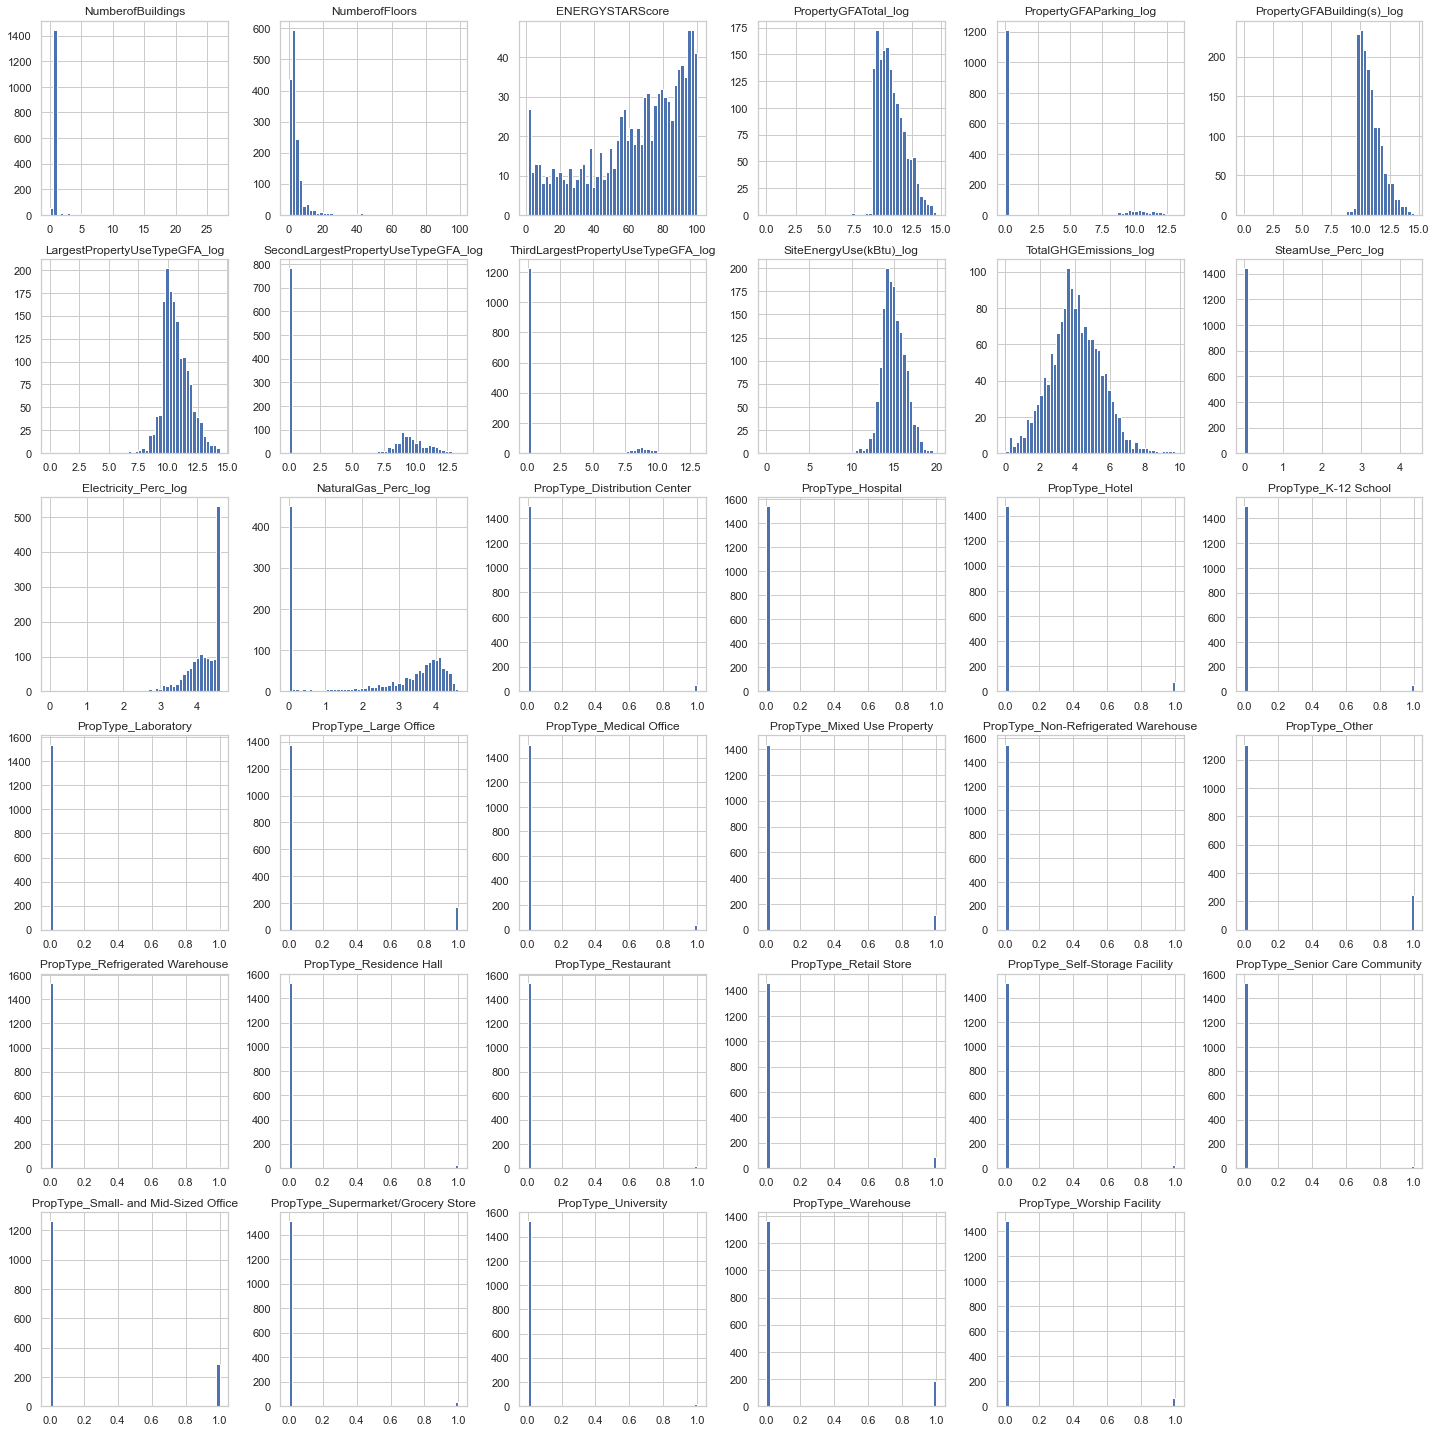

In [27]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize =(20,20))

# scaling automatique selon type de présentation ('paper', 'talk', 'poster', 'notebook')
sns.set_context("paper")
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()

plt.show()

# Note that calling show() is optional in a Jupyter notebook,
# as Jupyter will automatically display plots when a cell is executed.

# 2 | Créer un jeu de test

### Nécessité de la création dès le départ d'un jeu de test

Avant d'observer plus en détail les données, nous devons **créer un jeu de test**, le laisser de côté, et **ne plus le regarder.**<br>

Notre cerveau étant capable de détecter des systèmes de modèles, ce qui lui donne une tendance naturelle au surapprentissage: si nous regardons le jeu de test, nous pourrions tomber sur un modèle intéressant dans le jeu de test qui nous pousserait à sélectionner un type particulier de modèle de Machine Learning.

Lorsqu'on on estime l'erreur de généralisation en utilisant le jeu de test, l'estimation est trop optimiste, et nous lancerons un système qui ne sera pas aussi performant qu'attendu :  c'est le **biais d'espionnage des données que l'on souhaite éviter**.

Scikit-Learn propose quelques fonctions pour séparer les jeux de donnéesen de multiple sous-ensembles.

La fonction la plus simple est **train_test_split()**.

-  Premièrement, il y a un paramètre **random_state** qui permet de **fixer la graine du générateur aléatoire**.

-  Ensuite, nous pouvons lui passer **plusieurs jeux de données** aux nombres de lignes identiques, et il va les **diviser sur les mêmes indices** (très utile, par exemple, si nous avons un DataFrame spécifique pour les étiquettes)

Il existe des méthodes d'**échantillonnage purement aléatoires**, ce qui est généralement **satisfaisant si le jeu de données est assez large** (relativement au nombre d'attributs), mais si ce n'est pas le cas, nous courrons le risque d'introduire un biais d'échantillonnage important.<br>

Avec environ 3000 individus, on peut considérer que notre **jeu de données** n'est **pas très large**. Or, une étude bien conduite doit essayer de **maintenir les proportions de la population totale dans l'échantillon**.<br>

Ceci est appelé **échantillonnage stratifié**:<br>
La population est divisée en **sous-groupes homogènes appelés strates**, et le nombre correct d'instances est échantillonné depuis chaque strate pour garantir que le jeu de **test est représentatif de la population totale**.

### Création d'un attribut catégoriel d'ENERGYSTARScore_cat

In [28]:
data.describe()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
count,1548.000000,1548.000000,1002.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,1.112403,4.260982,63.655689,10.709068,2.269393,10.854665,10.642527,4.795518,1.834276,14.891659,4.002244,0.215824,4.170119,2.406582,0.034238,0.00646,0.048450,0.032300,0.00646,0.109173,0.027132,0.072997,0.001292,0.156331,0.007752,0.013566,0.008398,0.056202,0.018088,0.012920,0.185401,0.025194,0.013566,0.119509,0.044574
std,1.207186,6.745563,28.711668,1.218146,4.352265,1.005268,1.155764,4.942108,3.619644,1.407897,1.472590,0.835204,0.496967,1.735968,0.181898,0.08014,0.214784,0.176852,0.08014,0.311957,0.162520,0.260216,0.035933,0.363286,0.087732,0.115717,0.091284,0.230385,0.133312,0.112966,0.388748,0.156764,0.115717,0.324491,0.206432
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,44.250000,9.770870,0.000000,10.091874,9.869646,0.000000,0.000000,13.985796,3.040825,0.000000,3.914620,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,71.000000,10.508225,0.000000,10.649167,10.495663,0.000000,0.000000,14.791097,3.918701,0.000000,4.275485,3.213460,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,88.000000,11.458746,0.000000,11.421654,11.365541,9.528084,0.000000,15.785793,4.991026,0.000000,4.615121,3.920636,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,99.000000,100.000000,14.598826,13.147269,14.602314,14.354333,13.369117,13.038436,19.921036,9.733386,4.352855,4.615121,4.615121,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Compte-tenu de la demande spécifique de pouvoir s'en passer, nous considérons que **l'ENERGYSTARScore est un attribut important** à prendre en compte dans notre étude, et dans la constitution des échantillons.<br>
En effet, on nous demande de pouvoir nous passer de cet indicateur dans le futur. Pour cela nous devons **nous assurer qu'il ne constituerait pas un biais** dans la manière de construire nos jeux d'entrainement et de test.<br>

Pour cela nous allons nous assurer que les **proportions de chaque classe d'ENERGYSTARScore_cat** sont bien égales entre le jeu de donnée total et les jeux d'entrainement et de test.<br>
Nous allons ainsi nous assurer que **les jeux d'entrainement et de test sont représentatifs** des différentes catégories de score de l'ensemble du jeu de données.<br>
Puisque l'ENERGYSTARScore est un attribut numerique continu, nous devons d'abord **créer un attribut catégoriel d'ENERGYSTARScore**.<br>

Regardons l'histogramme de l'ENERGYSTARScore de plus près: **les valeurs s'échelonnent entre 0 et 100**.<br>
Il est important d'avoir un nombre suffisant d'instances pour chaque strate, sinon l'estimation de l'importance d'une strate peut être biaisée. Il ne faut pas prévoir trop de strates, et chacune devrait être suffisament large.<br>
Le code suivant utilise la fonction pd.cut() **créer un attribut catégoriel de l'ENERGYSTARScore avec 5 catégories** (nommées de 1 à 5): la catégorie 1 s'étend de 0 to 20 (i.e., moins de 20), la catégorie 2 de 20 à 30, etc:

In [29]:
# on copie le jeu de données dans data_bkp avant de supprimmer les nan
data_bkp = data.copy()
# on supprime les lignes avec nan de data (ENERGYSTARScore)
data.dropna(inplace=True)
# on réinitialise les indices
data.reset_index(drop=True, inplace=True)

In [30]:
# on découpe la variable en 5 classes étalées de 0 à 100 :
data["ENERGYSTARScore_cat"] = pd.cut(data["ENERGYSTARScore"],
                               bins =[0, 20, 40, 60, 80, np.inf],
                               labels =[1, 2, 3, 4, 5])

<AxesSubplot:>

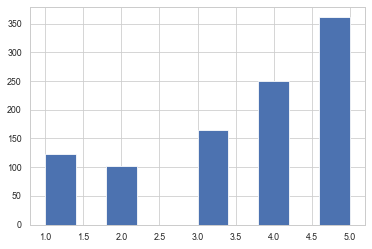

In [31]:
# on visualise la répartition par classe de la variable :
data["ENERGYSTARScore_cat"].hist()

Nous sommes prêts à faire de l'**échantillonnage stratifié** sur base de l'**ENERGYSTARScore, de SiteEnergyUse(kBtu), et de TotalGHGEmissions**.<br>
Pour cela nous allons utiliser la classe **StratifiedShuffleSplit** de Scikit-Learn:

### Construction des jeux de test strat_train_set et strat_test_set par échantillonnage stratifié

In [32]:
# on crée les jeux de tets et d'entrainement avec la stratification selon "ENERGYSTAR_Score_cat"
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(data, test_size = 0.2,
                                                   random_state = 42, stratify = data["ENERGYSTARScore_cat"])

Vérifions si cela a bien fonctionné. Observons les proportions d'ENERGYSTARScore dans le jeu de test:

In [33]:
strat_test_set["ENERGYSTARScore_cat"].value_counts() / len(strat_test_set)

5    0.358209
4    0.248756
3    0.164179
1    0.124378
2    0.104478
Name: ENERGYSTARScore_cat, dtype: float64

In [34]:
strat_train_set["ENERGYSTARScore_cat"].value_counts() / len(strat_train_set)

5    0.360799
4    0.250936
3    0.164794
1    0.122347
2    0.101124
Name: ENERGYSTARScore_cat, dtype: float64

In [35]:
data["ENERGYSTARScore_cat"].value_counts() / len(data["ENERGYSTARScore_cat"])

5    0.360279
4    0.250499
3    0.164671
1    0.122754
2    0.101796
Name: ENERGYSTARScore_cat, dtype: float64

Les proportions de chaque classe d'ENERGYSTARScore_cat sont bien identiques dans les trois groupes de données.<br>
Nous avons bien **échantillonné sans introduire de biais sur cette feature clé**. 

In [36]:
# Retirons l'attribut ENERGYSTARScore_cat 
# pour que data revienne à son état original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("ENERGYSTARScore_cat", axis = 1, inplace = True)

In [37]:
strat_train_set.shape

(801, 35)

In [38]:
strat_test_set.shape

(201, 35)

Nous avons passé un bon moment sur la génération des jeux de test: c'est une étape **souvent négligée mais critique** dans un projet de Machine Learning.

De plus, ces notions seront utiles **au moment de discuter de validation croisée**.

Passons à l'étape suivante: l'exploration des données.

# 3 | Explorer rapidement les données d'entrainement pour gagner en compréhension

Jusqu'ici nous avons jeté un rapide coup d'oeil aux données d'entrainement pour avoir une meilleure compréhension générale du type de données que l'on manipule.

Le but est maintenant d'aller plus en profondeur.

Notre jeu de données d'entrainement étant relativement petit, inutile d'en extraire un échantillon à étudier, nous allons travailler directement sur le jeu de données entier.

Créons une copie pour que l'on puisse jouer avec sans risques pour le jeu d'apprentissage:

In [39]:
data = strat_train_set.copy()

In [40]:
data.shape

(801, 35)

In [41]:
data.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
156,1.0,2.0,47.0,9.240676,0.000000,9.795735,9.618801,0.000000,0.000000,14.133711,4.004420,0.0,3.526655,4.219361,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
831,1.0,99.0,80.0,9.274629,0.000000,9.815366,9.698491,0.000000,0.000000,12.501980,1.054312,0.0,4.615121,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
732,1.0,16.0,94.0,13.059543,11.860769,12.723690,12.631605,11.722838,9.811372,16.695263,4.877713,0.0,4.607667,0.559616,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
718,1.0,6.0,74.0,12.528833,11.333703,12.207297,12.134356,11.186904,8.579792,16.513934,4.649857,0.0,4.615121,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
975,1.0,1.0,61.0,9.662435,0.000000,10.058994,9.968573,0.000000,0.000000,13.294906,2.967847,0.0,3.977436,3.884035,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Rechercher les Corrélations

### Comme le jeu de données n'est pas trop large, on peut calculer le **coefficient de corrélation standard (Pearson’s r)** entre chaque paire d'attributs à l'aide de la méthode corr():

In [42]:
corr_matrix = data.corr()

Observons comment chaque attribut est corrélé avec SiteEnergyUse(kBtu) et TotalGHGEmissions:

In [43]:
pd.set_option('display.max_rows', 200)
corr_matrix["SiteEnergyUse(kBtu)_log"].sort_values(ascending = False)

SiteEnergyUse(kBtu)_log                 1.000000
TotalGHGEmissions_log                   0.886509
PropertyGFATotal_log                    0.811119
PropertyGFABuilding(s)_log              0.797626
LargestPropertyUseTypeGFA_log           0.783488
NumberofFloors                          0.459158
PropType_Large Office                   0.456052
SecondLargestPropertyUseTypeGFA_log     0.410876
PropertyGFAParking_log                  0.386499
ThirdLargestPropertyUseTypeGFA_log      0.360737
PropType_Hospital                       0.229162
SteamUse_Perc_log                       0.219298
NumberofBuildings                       0.171343
PropType_Supermarket/Grocery Store      0.168236
PropType_Hotel                          0.149731
PropType_Medical Office                 0.142801
PropType_Senior Care Community          0.079548
PropType_Mixed Use Property             0.078563
Electricity_Perc_log                    0.072645
PropType_Other                          0.058680
NaturalGas_Perc_log 

In [44]:
pd.set_option('display.max_rows', 200)
corr_matrix["TotalGHGEmissions_log"].sort_values(ascending = False)

TotalGHGEmissions_log                   1.000000
SiteEnergyUse(kBtu)_log                 0.886509
PropertyGFABuilding(s)_log              0.659549
PropertyGFATotal_log                    0.653849
LargestPropertyUseTypeGFA_log           0.648670
NaturalGas_Perc_log                     0.396262
NumberofFloors                          0.347513
SteamUse_Perc_log                       0.316850
PropType_Large Office                   0.292831
SecondLargestPropertyUseTypeGFA_log     0.285771
ThirdLargestPropertyUseTypeGFA_log      0.259203
PropType_Hotel                          0.245841
PropType_Hospital                       0.243923
PropertyGFAParking_log                  0.239799
NumberofBuildings                       0.205410
PropType_Supermarket/Grocery Store      0.183013
PropType_Senior Care Community          0.117391
PropType_Medical Office                 0.116732
PropType_K-12 School                    0.052513
PropType_Mixed Use Property             0.040474
PropType_Other      

Le coefficient de corrélation s'étend de –1 à 1.

Proche de 1, cela signifie qu'il existe une forte corrélation positive; par exemple, la SiteEnergyUse(kBtu) tend à augmenter avec la surface, plus précisément lorsque LargestPropertyUseTypeGFA augmente.

Proche de –1, cela signifie qu'il existe une forte corrélation négative; on peut observer une corrélation négative entre SiteEnergyUse(kBtu) et DistKm_CityCenter (i.e., la consommation énergétique a tendance à diminuer à mesure qu'augmente la distance depuis le centre-ville). 

Enfin, les coefficients proches de 0 signifient qu'il n'existe pas de corrélation linéaire (mais potentiellement d'autre corrélations non linéaires pourraient exister).

Un autre moyen de **vérifier les corrélations** entre attributs est d'utiliser **la fonction pandas scatter_matrix()**, qui trace chaque attribut numérique avec chaque autre attribut numerique.

Puisque les attributs numériques sont nombreux, cela ne passerait pas sur une page, donc **concentrons nous sur quelques attributs prometteurs** qui semblent **plus corrélés** avec les deux valeurs à prédire.

### **pour 'SiteEnergyUse(kBtu)_log'** : 

In [45]:
data.columns

Index(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore',
       'PropertyGFATotal_log', 'PropertyGFAParking_log',
       'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log',
       'SecondLargestPropertyUseTypeGFA_log',
       'ThirdLargestPropertyUseTypeGFA_log', 'SiteEnergyUse(kBtu)_log',
       'TotalGHGEmissions_log', 'SteamUse_Perc_log', 'Electricity_Perc_log',
       'NaturalGas_Perc_log', 'PropType_Distribution Center',
       'PropType_Hospital', 'PropType_Hotel', 'PropType_K-12 School',
       'PropType_Laboratory', 'PropType_Large Office',
       'PropType_Medical Office', 'PropType_Mixed Use Property',
       'PropType_Non-Refrigerated Warehouse', 'PropType_Other',
       'PropType_Refrigerated Warehouse', 'PropType_Residence Hall',
       'PropType_Restaurant', 'PropType_Retail Store',
       'PropType_Self-Storage Facility', 'PropType_Senior Care Community',
       'PropType_Small- and Mid-Sized Office',
       'PropType_Supermarket/Grocery Store', 'PropT

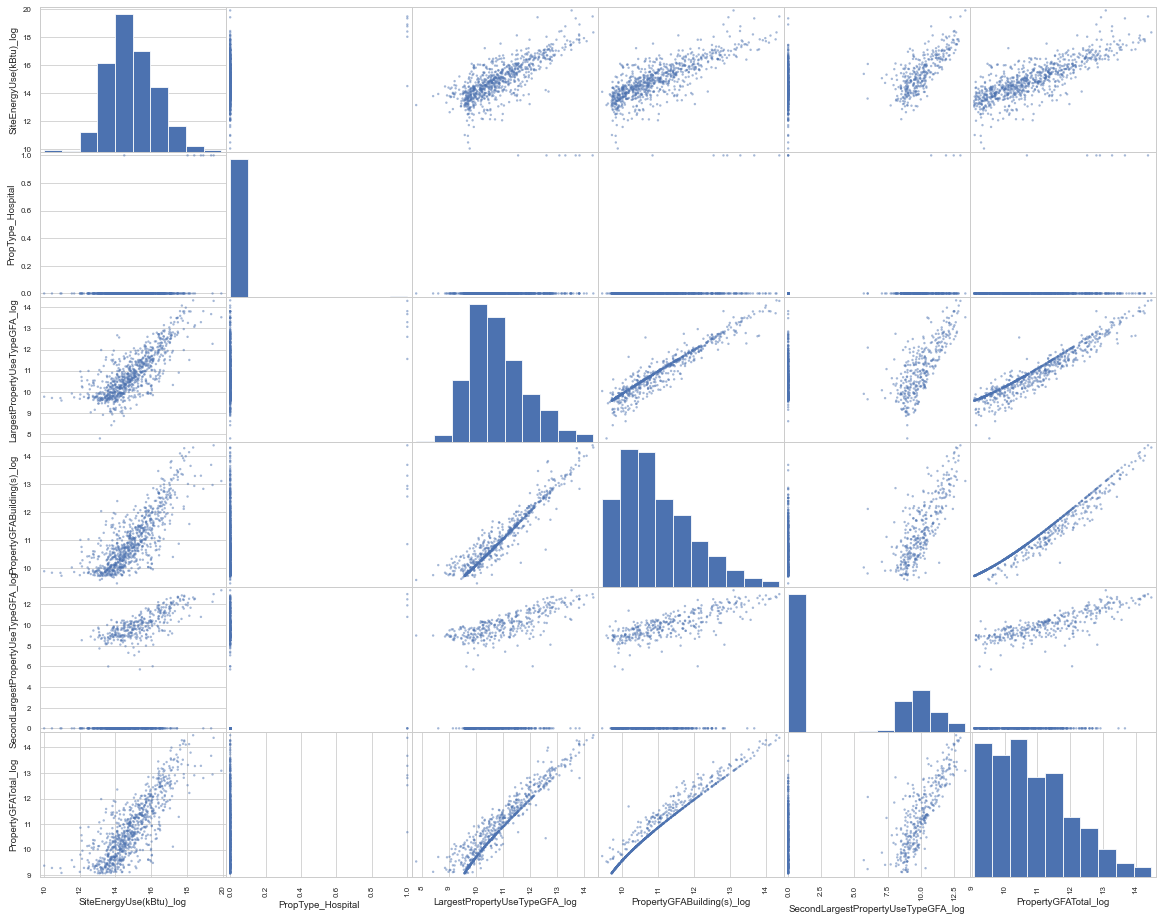

In [46]:
from pandas.plotting import scatter_matrix
attributes = ['SiteEnergyUse(kBtu)_log', 'PropType_Hospital', 'LargestPropertyUseTypeGFA_log',
              'PropertyGFABuilding(s)_log', 'SecondLargestPropertyUseTypeGFA_log', 'PropertyGFATotal_log']
scatter_matrix(data[attributes], figsize =(20, 16))
plt.show()

La diagonale principale (d'en haut à gauche à en bas à droite) serait rempli de lignes droites si pandas traçait chaque variable contre elle-même, ce qui ne serait pas très utile. A la place pandas montre un histogramme de chaque atribut. 

L'attribut **le plus prometteur pour prédire la consommation énergétique et l'émission de gaz CO2** est **'LargestPropertyUseTypeGFA'**. Faisons un zoom sur le nuage de point correspondant:

<AxesSubplot:xlabel='LargestPropertyUseTypeGFA_log', ylabel='SiteEnergyUse(kBtu)_log'>

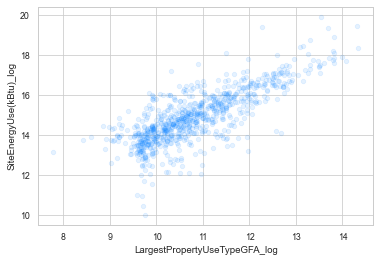

In [47]:
data.plot(kind ="scatter", x ='LargestPropertyUseTypeGFA_log', y ='SiteEnergyUse(kBtu)_log',
          alpha = 0.1, c=np.array([0.0, 0.5, 1]).reshape(1,-1))

### **pour 'TotalGHGEmissions'** : 

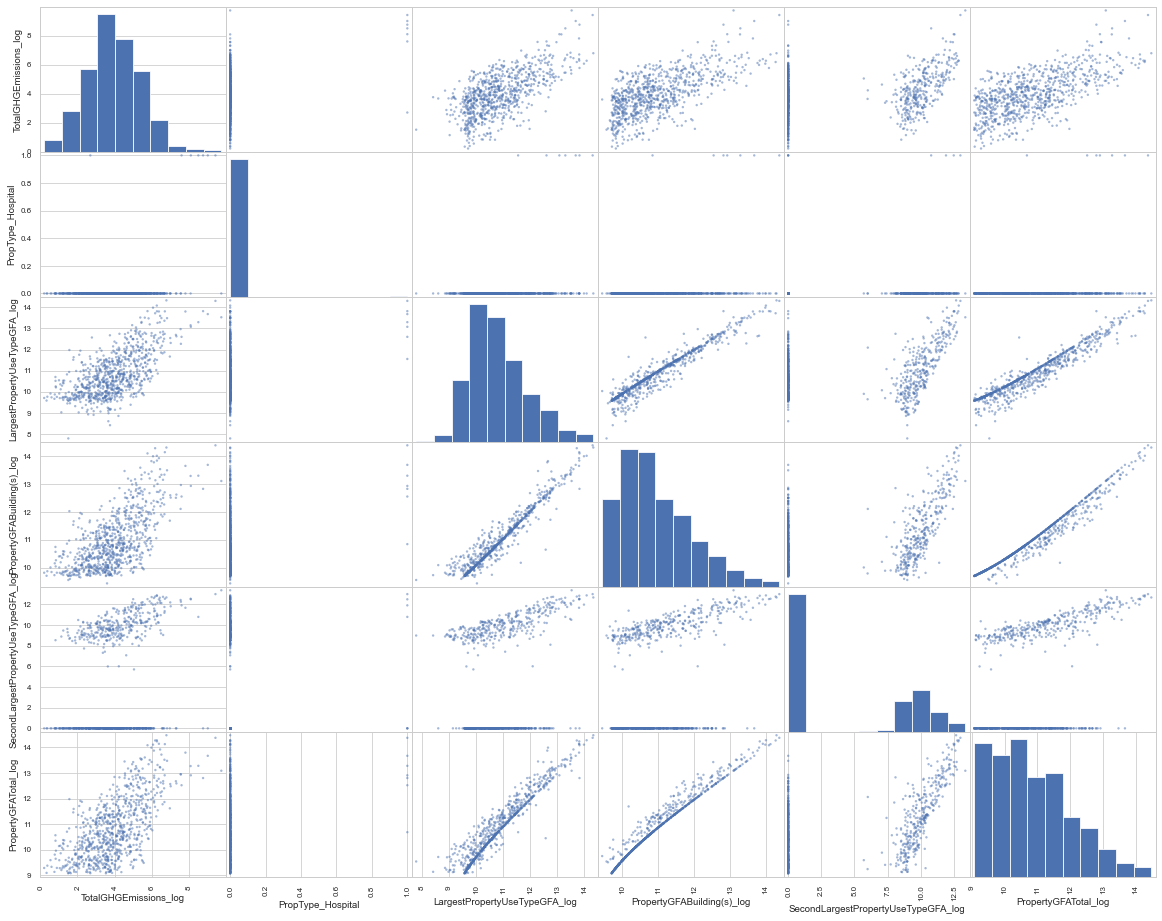

In [48]:
from pandas.plotting import scatter_matrix
attributes = ['TotalGHGEmissions_log', 'PropType_Hospital', 'LargestPropertyUseTypeGFA_log',
              'PropertyGFABuilding(s)_log', 'SecondLargestPropertyUseTypeGFA_log', 'PropertyGFATotal_log']
scatter_matrix(data[attributes], figsize =(20, 16))
plt.show()

La diagonale principale (d'en haut à gauche à en bas à droite) serait rempli de lignes droites si pandas traçait chaque variable contre elle-même, ce qui ne serait pas très utile. A la place pandas montre un histogramme de chaque atribut. 

L'attribut **le plus prometteur pour prédire la consommation énergétique et l'émission de gaz CO2** est **'LargestPropertyUseTypeGFA'**. Faisons un zoom sur le nuage de point correspondant:

<AxesSubplot:xlabel='LargestPropertyUseTypeGFA_log', ylabel='TotalGHGEmissions_log'>

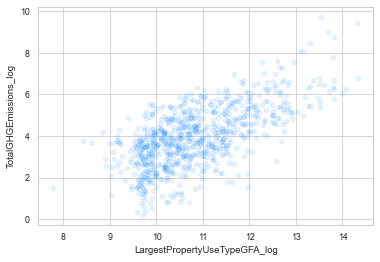

In [49]:
data.plot(kind ="scatter", x ='LargestPropertyUseTypeGFA_log', y ='TotalGHGEmissions_log',
          alpha = 0.1, c=np.array([0.0, 0.5, 1]).reshape(1,-1))

Ce graphique révèle certaines choses :

-  Premièrement, la **corrélation est réellement forte**; on peut clairement voir la tendance positive, et les **points ne sont pas trop dispersés**.

-  Ensuite, il ne révèle pas **de lignes droites**, qu'il serait nécessaire de supprimer pour éviter que l'apprentissage reproduise ces données bizarres.

## Expérimenter des Combinaisons d'Attribut

Nous avons pu nous faire une idée à partir de l'exploration et avons pu obtenir quelques informations intéressantes. Nous avons trouvés des corrélations intéressantes entre attributs, en particulier avec les attributs cible. Nous avons également remarqué que certains attributs ont une distribution non symétrique et concentrée, nous souhaitons les transformer.

Avant cela nous allons **essayer plusieurs combinaisons d'attributs**.

Par exemple, la **PropertyGFABuilding(s)** et le **NumberofFloors** séparés peuvent être moins instructifs sur la consommation que la surface par étage, soit le rapport de l'un sur l'autre.

Créons ce nouvel attribut:

In [50]:
data["PropertyGFABuilding_per_floor"] = data["PropertyGFABuilding(s)_log"]/data["NumberofFloors"]

In [51]:
corr_matrix = data.corr()

In [52]:
corr_matrix["SiteEnergyUse(kBtu)_log"].sort_values(ascending = False)

SiteEnergyUse(kBtu)_log                 1.000000
TotalGHGEmissions_log                   0.886509
PropertyGFATotal_log                    0.811119
PropertyGFABuilding(s)_log              0.797626
LargestPropertyUseTypeGFA_log           0.783488
NumberofFloors                          0.459158
PropType_Large Office                   0.456052
SecondLargestPropertyUseTypeGFA_log     0.410876
PropertyGFAParking_log                  0.386499
ThirdLargestPropertyUseTypeGFA_log      0.360737
PropType_Hospital                       0.229162
SteamUse_Perc_log                       0.219298
NumberofBuildings                       0.171343
PropType_Supermarket/Grocery Store      0.168236
PropType_Hotel                          0.149731
PropType_Medical Office                 0.142801
PropType_Senior Care Community          0.079548
PropType_Mixed Use Property             0.078563
Electricity_Perc_log                    0.072645
PropType_Other                          0.058680
NaturalGas_Perc_log 

In [53]:
corr_matrix["TotalGHGEmissions_log"].sort_values(ascending = False)

TotalGHGEmissions_log                   1.000000
SiteEnergyUse(kBtu)_log                 0.886509
PropertyGFABuilding(s)_log              0.659549
PropertyGFATotal_log                    0.653849
LargestPropertyUseTypeGFA_log           0.648670
NaturalGas_Perc_log                     0.396262
NumberofFloors                          0.347513
SteamUse_Perc_log                       0.316850
PropType_Large Office                   0.292831
SecondLargestPropertyUseTypeGFA_log     0.285771
ThirdLargestPropertyUseTypeGFA_log      0.259203
PropType_Hotel                          0.245841
PropType_Hospital                       0.243923
PropertyGFAParking_log                  0.239799
NumberofBuildings                       0.205410
PropType_Supermarket/Grocery Store      0.183013
PropType_Senior Care Community          0.117391
PropType_Medical Office                 0.116732
PropType_K-12 School                    0.052513
PropType_Mixed Use Property             0.040474
PropType_Other      

L'**hypothèse n'est pas vérifiée**:<br>
-  Au vu des corrélations avec SiteEnergyUse(kBtu), le nouvel attribut créé (PropertyGFABuilding_per_floor) n'est finalement **pas plus instructif que les deux éléments** PropertyGFABuilding(s) et NumberofFloors **considérés séparément**.

-  En ce qui concerne les corrélations avec TotalGHGEmissions, nous faisons le même constat.

# 4 | Préparer les données pour les algorithmes de ML

C'est le moment de préparer les données pour nos alogrithmes de Machine Learning. Plutôt que de faire cela manuellement, nous **allons écrire des fonctions** dand ce but, pour quelques bonnes raisons:
-  Cela nous permettra de **reproduire ces transformations** facilement sur n'importe quel autre dataset à l'avenir.
-  Nous allons graduellement **construire une librairie de fonctions de transformation** réutilisables dans de futurs projets.
-  Nous pourrons **utiliser ces fonctions** dans notre **système de production** pour transformer les nouvelles données avant d'alimenter les algorithmes.
-  Cela rend facilement possible **l'essai de plusieurs transformations** et de voir quelles combinaison de transformations foncitonne le mieux.

## Créons le jeu d'entrainement, X et y

Revenons d'abord à deux **jeux d'entrainement nettoyés**, en copiant strat_train_set à nouveau.

Séparons ensuite **les attributs et les étiquettes**, car nous n'allons pas nécessairement appliquer les mêmes transformations aux attributs et aux valeurs cibles :

In [54]:
X = strat_train_set.drop(["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log"], axis = 1)
y = strat_train_set[["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log"]]

## 4.1 | Data cleaning

La plupart des algorithmes de Machine Learning ne peuvent pas travailler avec des **caractéristiques manquantes**, donc **créons quelques fonctions** pour remédier à cela.

Nous avions vu précédemment que les attributs **ENERGYSTARScore et ENERGYSTARScore_log** comportent des valeurs manquantes, nous devons corriger cela.<br>
Nous avons trois options:

-  supprimer les individus correspondants.
-  supprimer l'attribut.
-  Fixer les valeurs à une certaine valeur (zero, la moyenne,médiane, etc.).

### Options possibles | création du Simple Imputer

Nous pourrions réaliser ces actions à l'aide des méthodes dropna(), drop(), and fillna(): 

-  data.dropna(subset =['ENERGYSTARScore']) **# option 1**
-  data.drop("ENERGYSTARScore", axis = 1) **# option 2**
-  median = housing["ENERGYSTARScore"].median() **# option 3**<br>
   housing["ENERGYSTARScore"].fillna( median, inplace = True)

Si l'on choisit l'**option 3**, nous devrions **calculer la valeur médiane** sur le jeu d'entrainement et l'utiliser pour **compléter les valeurs manquantes** dans le jeu d'entrainement.

Il faudra **sauvegarder la valeur médiane** calculée.<br>
Nous en aurions besoin plus tard pour remplacer les valeurs manquantes dans le jeu de test pour évaluer lee modèle, et également une fois le modèle live, pour remplacer la valeurs manquantes dans les nouvelles données.

Scikit-Learn propose une classe pour traiter les valeurs manquantes: **SimpleImputer**.<br>
Pour l'utiliser, nous **créons une instance SimpleImputer**, en spécifiant que l'on souhaite **remplacer chaque valeur manquante** des attributs par la **médiane de cet attribut**:

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

### 4.1.1 | Préparation data_ssu | remplacé par Pipeline

In [56]:
# data_ssu.head()

Nous pouvons maintenant **entrainer l'instance imputer** sur le jeu d'entrainement à l'aide de la méthode **fit()**:

In [57]:
# imputer.fit(data_ssu)

L'imputer a simplement **calculé la médiane pour chaque attribut** et **stock" le résultat dans sa variable d'instance statistics_**.<br>
Uniquement les attributs **ENERGYSTARScore et ENERGYSTARScore_log** ont des valeurs manquantes, mais nous ne pouvons pas être certains qu'il n'y aura pas de données manquantes lorsque le modèle sera lancé en production, il est donc plus sûr d'**appliquer l'imputer sur tous les attributs numériques**:

In [58]:
# imputer.statistics_

In [59]:
# data_ssu.median().values

Nous pouvons maintenant utiliser cet Imputer “entrainé” pour transformer le jeu d'entrainement en remplaçant les valeurs manquantes avec les médianes apprises:

In [60]:
# X = imputer.transform(data_ssu)

Le résultat est un **NumPy array** simple contenant les **caractéristiques transformées**.<br>
Nous allons les remettre au format **pandas DataFrame** :

In [61]:
# data_ssu_tr = pd.DataFrame(X, columns = data_ssu.columns, index = data_ssu.index)

### 4.1.2 | Préparation data_emi | remplacé par Pipeline

Suivons les mêmes étapes pour transformer le jeu de données data_emi :

In [62]:
# imputer.fit(data_emi)

In [63]:
# X = imputer.transform(data_emi)

In [64]:
# data_emi_tr = pd.DataFrame(X, columns = data_emi.columns, index = data_emi.index)

## 4.2 | Gestion du texte et des variables catégorielles | intégré au Pipeline

Jusqu'ici nous avons traité uniquement les attributs numériques, mais regardons maintenant les **attributs catégoriels**.

Dans ce dataset, il y en a deux, qui se présentent pourtant sous la forme de chiffres: l'année de construction **YearBuilt**, ainsi que le **ZipCode**, ou code postal. Regardons leurs valeurs pour les 10 premières instances:

In [65]:
# data.head()

In [66]:
# data_cat_spe = data[['YearBuilt', 'ZipCode']]
# data_cat_spe.head( 10)

Il ne s'agit pas de texte arbitraire : 
-  il existe un nombre limité de valeurs possibles, 
-  chacune représente une catégorie.

Ces attributs sont bien des **attributs catégoriels**.
Bien qu'ils soient représentés par des chiffres, ceux-ci n'ont pas de signification numérique: le numéro qui désigne une année est considéré comme un nom, mais on ne peut pas sommer des années, de même que les codes postaux ne peuvent pas non plus faire l'objet d'opérations mathématiques.

La plupart des algorithmes de Machine Learning **préfèrent travailler avec des nombres sur lesquels des opérations peuvent être réalisées**.

Nous allons **créer un attribut binaire par categories**: un attribut **égal à 1** lorsque la catégorie "YearBuilt" est “1906” (**et 0 sinon**), de même un autre attribut égal à 1 quand la catégorie ZipCode est “98181” (et 0 sinon), etc.

On appelle ce traitement le **one-hot encoding**, car seulement un attribut sera égal à **1 (hot)**, tandis que les autres seront à **0 (cold)**. Ces nouveaux attributs sont parfois nommés **dummy attributes**. Scikit-Learn propose une classe OneHotEncoder class pour convertir les valeurs catégorielles en vecteurs one-hot:

In [67]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [68]:
# data_cat_1hot = cat_encoder.fit_transform(data_cat_spe)
# data_cat_1hot

La sortie est une **matrice creuse SciPy**, à la place d'un tableau NumPy. C'est très utile lorsque l'on a des attributs catégoriels avec beaucoup de catégories. 

**Après le one-hot encoding**, on obtient une **matrice avec des milliers de colonnes**, et la matrice est remplie de zéros à l'exception d'un unique 1 par ligne. Utiliser la mémoire pour stocker des zéros serait du gâchis, à la place **une matrice creuse stocke uniquement la valeur des éléments non nuls**. Cela s'utilise comme un tableau 2D, on peut le convertir au besoin en un tableau Numpy (dense), via la méthode toarray() :

On peut obtenir la liste des catégories à l'aide de la variable d'instance **categories_**:

In [69]:
# cat_encoder.categories_

SI un attribut catégoriel contient un large éventail de catégories possibles (e.g., ZipCode, années), alors **l'encodage one-hot créera un large nombre de caractéristiques d'entrée**.

Ceci pourrait **ralentir l'entrainement et dégrader la performance**.

Nous allons tester, mais si tel est le cas, nous pourrions **remplacer l'input catégoriel avec des caractéristiques numériques utiles liées à ces catégories**: par exemple, l'année de construction pourrait être remplacée par l'âge du bâtiment (de manière similaire, un CodeZip peut être remplacé par la population correspondante). 

Une autre alternative consisterait à **remplacer chaque catégorie par un vecteur apprenable, de faible dimension** appelé un "embedding".

## 4.4 | Transformation Pipeline

In [70]:
X.describe(include='all')

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.0,801.000000,801.000000,801.000000,801.0,801.000000,801.000000
mean,1.016230,5.146067,63.755306,10.838533,2.571641,10.960180,10.829045,4.323356,1.298447,0.213125,4.205485,2.235217,0.042447,0.008739,0.067416,0.048689,0.0,0.144819,0.042447,0.028714,0.002497,0.012484,0.004994,0.019975,0.0,0.068664,0.0,0.017478,0.240949,0.038702,0.0,0.142322,0.068664
std,0.472743,8.487042,28.556918,1.191058,4.554392,0.987224,1.059253,5.044425,3.230247,0.821387,0.487979,1.766545,0.201733,0.093132,0.250897,0.215352,0.0,0.352138,0.201733,0.167106,0.049938,0.111103,0.070534,0.140002,0.0,0.253040,0.0,0.131126,0.427927,0.193003,0.0,0.349598,0.253040
min,0.000000,0.000000,1.000000,9.072916,0.000000,9.438670,7.785721,0.000000,0.000000,0.000000,0.371564,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,45.000000,9.881037,0.000000,10.172025,9.981189,0.000000,0.000000,0.000000,3.961575,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,3.000000,71.000000,10.627891,0.000000,10.743545,10.631616,0.000000,0.000000,0.000000,4.352469,2.977059,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,5.000000,88.000000,11.593371,0.000000,11.516708,11.486017,9.629906,0.000000,0.000000,4.615121,3.867862,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,8.000000,99.000000,100.000000,14.478681,13.147269,14.382150,14.331492,13.369117,13.038436,4.194793,4.615121,4.610655,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [71]:
X.shape

(801, 33)

In [72]:
# corrigeons la liste des attributs X_num
# qui ne devrait pas contenir
# 'PropertyGFABuilding_per_floor' qui s'est révélé mauvais 
# ni les variables à prédire, à traiter à part au besoin
X_num = [item for item in data.columns if item not in [
    'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
    'PropertyGFABuilding_per_floor']]

L'une des **plus importante transformations** à appliquer aux données est le **feature scaling**, ou la mise à l'échelle.

A peu d'exception près, les algorithmes de Machine Learning **ne sont pas performants lorsque les entrées des attributs numériques ont différentes échelles**.

C'est le cas pour **notre jeu de données**: 
-  les surfaces **PropertyGFATotal** s'étendent de **20.000 à 1.952.220**, tandis que 
-  the **NumberofFloors** s'étend seulement **de 0 à 99**.

La mise à l'échelle de la valeur cible est généralement non requise.

Il existe deux moyens courants d'amener tous les attributs à la même échelle:
-  **min-max scaling** et 
-  **standardization**

**Min-max scaling** (on l'appelle aussi normalisation) est le plus simple: les valeurs sont décalées et redimensionnées afin qu'elles finissent par varier de 0 à 1. On réalise ceci en **soustrayant la valeur minimale et en divisant par le max moins le min**. Scikit-Learn propose un transformer appelé **MinMaxScaler** pour cela. 

**La standardisation est différente**: d'abord elle soustrait la valeur moyenne (les valeurs standardisées ont toujours **une moyenne à zéro**), et ensuite elle divise par l'écart-type afin que la distribution résultante aie une **variance unitaire**.<br>
A la différence du min-max scaling, la standardisation ne lie pas les valeurs values à une plage spécifique (entre 0 et 1 par exemple), ce qui pourrait être un problème pour certains algorithmes (par exemple les réseaux de neurones attendent souvent une valeur d'entrée située entre 0 et 1).<br> 

Cependant, la **standardisation est bien moins affectée par les outliers**.<br>

Scikit-Learn propose un transformer appelé **StandardScaler** pour la standardisation.

Comme pour toutes les transformations, nous allons **entrainer les scalers sur le jeu de données d'entrainement seulement**, et non sur le jeu de données entier (incluant le jeu de test).

De nombreuses étapes de transformation des données existent qui requièrent d'être exécutées dans le bon ordre. Heureusement, Scikit-Learn propose une classe **Pipeline** pour aider à effectuer ces transformations dans l'ordre. Ici un pipeline pour les **attributs numériques**:

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy ="median")),
                         ('std_scaler', StandardScaler())])

In [74]:
# créons un num_pipeline_rfo sans le StandardScaler
# pour RandomForest (pas de std scaling)
num_pipeline_rfo = Pipeline([('imputer', SimpleImputer(strategy ="median"))])

Le constructeur de Pipeline prend une liste de paires de noms/estimateurs qui définissent une séquence d'étapes. Tous les estimateurs hormis le dernier doivent être des transformers (c.à.d qu'ils doivent avoir une méthode fit_transform()).

Lorsqu'on appelle la méthode fit() du pipeline, elle appelle fit_transform() séquentiellement sur tous les transformers, passant la sortie de chaque étape comme paramètre pour la prochaine étapejusqu'à atteindre le dernier estimateur, pour lequel elle appelle la méthode fit().

Le pipeline utilise les mêmes méthodes que l'estimateur final. Ici le dernier estimateur est un StandardScaler, qui est un transformer, donc le pipeline a une méthode transform() qui applique toutes les transformations aux donnéesdans la séquence.

Jusqu'ici nous avons traité les colonnes catégorielles et numériques de manière distincte. Il pourrait être plus pratique d'avoir un **unique transformer** capable de **gérer toutes les colonnes**, appliquant les **transformations appropriées à chaque colonne**.

Dans sa version 0.20, Scikit-Learn a introduit le **ColumnTransformer** dans ce but, il fonctionne très bien avec les DataFrames pandas. Utilisons-le pour appliquer toutes les transformations aux données X.

In [75]:
X_num

['NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log',
 'PropertyGFABuilding(s)_log',
 'LargestPropertyUseTypeGFA_log',
 'SecondLargestPropertyUseTypeGFA_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'SteamUse_Perc_log',
 'Electricity_Perc_log',
 'NaturalGas_Perc_log',
 'PropType_Distribution Center',
 'PropType_Hospital',
 'PropType_Hotel',
 'PropType_K-12 School',
 'PropType_Laboratory',
 'PropType_Large Office',
 'PropType_Medical Office',
 'PropType_Mixed Use Property',
 'PropType_Non-Refrigerated Warehouse',
 'PropType_Other',
 'PropType_Refrigerated Warehouse',
 'PropType_Residence Hall',
 'PropType_Restaurant',
 'PropType_Retail Store',
 'PropType_Self-Storage Facility',
 'PropType_Senior Care Community',
 'PropType_Small- and Mid-Sized Office',
 'PropType_Supermarket/Grocery Store',
 'PropType_University',
 'PropType_Warehouse',
 'PropType_Worship Facility']

In [76]:
from sklearn.compose import ColumnTransformer

num_attribs = X_num
# cat_attribs = data_cat
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)])

# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs),
#     ("cat", OneHotEncoder(), cat_attribs),
# ])

X_prepared = full_pipeline.fit_transform(X)

In [77]:
# créons un jeu de données préparées pour RandomForest, 
# en passant par ColumnTransformer
num_attribs = X_num
# cat_attribs = data_cat

full_pipeline_rfo = ColumnTransformer([
    ("num", num_pipeline_rfo, num_attribs)])


# full_pipeline_rfo = ColumnTransformer([
#     ("num", num_pipeline_rfo, num_attribs),
#     ("cat", OneHotEncoder(), cat_attribs),
# ])

X_prepared_rfo = full_pipeline_rfo.fit_transform(X)

In [78]:
full_pipeline_rfo.feature_names_in_

array(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore',
       'PropertyGFATotal_log', 'PropertyGFAParking_log',
       'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log',
       'SecondLargestPropertyUseTypeGFA_log',
       'ThirdLargestPropertyUseTypeGFA_log', 'SteamUse_Perc_log',
       'Electricity_Perc_log', 'NaturalGas_Perc_log',
       'PropType_Distribution Center', 'PropType_Hospital',
       'PropType_Hotel', 'PropType_K-12 School', 'PropType_Laboratory',
       'PropType_Large Office', 'PropType_Medical Office',
       'PropType_Mixed Use Property',
       'PropType_Non-Refrigerated Warehouse', 'PropType_Other',
       'PropType_Refrigerated Warehouse', 'PropType_Residence Hall',
       'PropType_Restaurant', 'PropType_Retail Store',
       'PropType_Self-Storage Facility', 'PropType_Senior Care Community',
       'PropType_Small- and Mid-Sized Office',
       'PropType_Supermarket/Grocery Store', 'PropType_University',
       'PropType_Warehouse', 'PropT

-  D'abord on importe la classe **ColumnTransformer**, 
-  ensuite on récupère la liste des **variables numériques** et la liste des **variables catégorielles**, et 
-  ensuite on construit un **ColumnTransformer**. Le constructeur nécessite une liste de tuples, ou chaque tuple contient un name, un transformer, et une liste de noms (ou indices) de colonnes sur lesquelles le transformer devrait être appliqué. Dans note cas, nous spécifions que les **variables numériques** doivent être transformées à l'aide du **num_pipeline** défini plus tôt, et les **variables catégorielles** doivent être transformées à l'aide du **OneHotEncoder**.

Finalement, on applique ce **ColumnTransformer aux données X**: il applique chaque transformer aux **colonnes appropriées** et concatène les sorties sur le second axe.

Nous avons maintenant obtenu un **pipeline de preprocessing** qui prend le jeu de données complet et applique les transformations appropriées à chaque colonne.

A la place d'utiliser un transformer, on peut utiliser la chaine de caractère "drop" pour supprimer des colonnes, ou "passthrough" pour laisser la colonne inchangée. Par défaut, toute colonne non citée est supprimée.

# 5 | Sélectionner, entrainer et comparer les différents modèles

Ca y est, nous avons défini le problème, avons exploré les données, échantillonné un jeu d'entrainement et un jeu de test, and nous avons écrit un pipeline de transformation pour nettoyer et préparer automatiquement les données pour les algorithmes de Machine Learning. Nous sommes prêts à sélectionner et entrainer un modèle de Machine Learning.

## Sauvegarde des modèles testés

**Sauvegarde des modèles**

Nous allons conserver les modèles que nous expérimentons afin de pouvoir y revenir facilement.
Nous enregistrerons les hyperparamètres et les paramètres, de même que les scores des validations croisées et les prédictions.<br>
Ceci permettra de comparer les scores enre chaque type de modèle, et le type d'erreur que chacun commet.<br>

Nous utiliserons pour cela la librairie joblib, qui peut sérialiser efficacement de larges tableaux Numpy.

In [79]:
# joblib.dump(my_model, "my_model.pkl") 
# # and later...
# my_model_loaded = joblib.load("my_model.pkl")

## 5.1 | SiteEnergyUse(kBtu)_log | comparaison des modèles ajustés avec GridSearchCV

### Voici pour mémoire quelques éléments pour décrire les étiquettes cibles : moyenne, écart-type, etc...

In [80]:
y['SiteEnergyUse(kBtu)_log'].describe()

count    801.000000
mean      14.921603
std        1.348915
min       10.024802
25%       13.986955
50%       14.795004
75%       15.800473
max       19.921036
Name: SiteEnergyUse(kBtu)_log, dtype: float64

Nous allons monter quelques modèles pour **prédire SiteEnergyUse(kBtu)**, et au lieu de chercher les meilleures combinaisons d'hyperparamètres manuellement, nous allons nous appuyer sur **GridSearchCV** pour effectuer cette recherche pour nous.

Nous allons l'informer des hyperparamètres que nous souhaitons tester, et les valeurs à essayer, et il utilisera la validation croisée pour évaluer toutes les combinaisons possibles de valeur pour les hyperparamètres.

Le **RandomForestRegressor** fournit à ce stade le **meilleur résultat de prédiction**, en minimisant l'erreur quadratique du modèle.

Commençons ci-dessous par fixer une baseline avec la **Régression Linéaire**:

### 5.1.1 - DummyRegressor = Baseline pour SiteEnergyUse(kBtu)_log

In [81]:
from sklearn.dummy import DummyRegressor
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

DummyRegressor()

C'est fait: nous avons un **modèle de régression naïf opérationnel qui renvoie la moyenne de l'échantillon**. Essayons-le sur quelques instances du jeu d'entrainement:

In [82]:
some_data = X.iloc[: 5]
some_labels = y["SiteEnergyUse(kBtu)_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", dum_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [14.92160271 14.92160271 14.92160271 14.92160271 14.92160271]
Labels: [14.133711021216847, 12.50197950752881, 16.6952633447832, 16.513934023769814, 13.294905796045475]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [83]:
from sklearn.metrics import mean_squared_error
X_predictions = dum_reg.predict(X_prepared)
dum_rmse = mean_squared_error(y["SiteEnergyUse(kBtu)_log"], X_predictions, squared = False)
dum_rmse

1.348073057226343

In [84]:
from sklearn.metrics import mean_absolute_error
dum_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
dum_mae

1.0698493991980593

L'**erreur quadratique est de 1,27**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [85]:
# sauvegarde du modèle
joblib.dump(dum_reg, "dum_reg_seu.pkl")

['dum_reg_seu.pkl']

On prépare une comparaison entre différents modèles et jeux de données (avec ou sans ENERGYSTARScore)

In [86]:
# on crée un DataFrame pour recueillir les évaluations
base_results = pd.DataFrame(columns=['Model', 'Target', 'ESS_status', 'RMSE', 'exp_RMSE', 'MAE'])

In [87]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'dum_reg', 'Target': 'seu', 'ESS_status' : 'in',
     'RMSE' : dum_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : dum_mae}, ignore_index=True)

In [88]:
base_results

,Model,Target,ESS_status,RMSE,exp_RMSE,MAE
0,dum_reg,seu,in,1.348073,3.85,1.069849


### 5.1.2 - Régression linéaire

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

LinearRegression()

C'est fait: nous avons un **modèle de régression linéaire opérationnel**. Essayons-le sur quelques instances du jeu d'entrainement:

In [90]:
some_data = X.iloc[: 5]
some_labels = y["SiteEnergyUse(kBtu)_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [13.95650377 12.62612809 16.555869   16.28456773 13.31781663]
Labels: [14.133711021216847, 12.50197950752881, 16.6952633447832, 16.513934023769814, 13.294905796045475]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [91]:
from sklearn.metrics import mean_squared_error
X_predictions = lin_reg.predict(X_prepared)
lin_rmse = mean_squared_error(y["SiteEnergyUse(kBtu)_log"], X_predictions, squared = False)
lin_rmse

0.4356654006225076

In [92]:
lin_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
lin_mae

0.29749741026002346

L'**erreur quadratique est de 0.43**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [93]:
# sauvegarde du modèle
joblib.dump(lin_reg, "lin_reg_seu.pkl")

['lin_reg_seu.pkl']

In [94]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'lin_reg', 'Target': 'seu', 'ESS_status' : 'in',
     'RMSE' : lin_rmse, 'exp_RMSE' : exp(lin_rmse), 'MAE' : lin_mae}, ignore_index=True)

### 5.1.3 - Ridge x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **Ridge** (ici un seul hyperparamètre 'alpha' est recherché):

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = [{'alpha': [1, 10, 100, 1000],
              'random_state': [20220519]},
             ]

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement **évaluer** les **4** valeurs d'hyperparamètres **alpha** spécifiées dans le dictionnaire, 
-  **entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 4 × 5 = 20 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [96]:
grid_search.best_params_

{'alpha': 10, 'random_state': 20220519}

Puisque 10 n'est pas la valeur maximum évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [97]:
ridge_reg_seu = grid_search.best_estimator_

GridSearchCV est initialisé par défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4695787782938899 {'alpha': 1, 'random_state': 20220519}
0.4694505560559127 {'alpha': 10, 'random_state': 20220519}
0.4793319248653332 {'alpha': 100, 'random_state': 20220519}
0.6950270211077109 {'alpha': 1000, 'random_state': 20220519}


In [99]:
X_predictions = ridge_reg_seu.predict(X_prepared)

In [100]:
ridge_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
ridge_mae

0.2973505679461563

Ici nous obtenons notre **meilleure solution** en réglant l'**hyperparamètre alpha à 10**. Le **score RMSE** pour ce paramétrage est de **0.45**, ce qui est moins bon que le score obtenu plus tôt avec la régression linéaire (0.43).

In [101]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "ridge_reg_seu.pkl") 

['ridge_reg_seu.pkl']

In [102]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'ridge_reg', 'Target': 'seu', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : ridge_mae }, ignore_index=True)

### 5.1.4 - SVM x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **SVM (Support Vector Machines)**:

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000, 5000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svm_reg = svm.SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement évaluer tous les **6 × 5 x 1 = 30 combinaisons** de valeurs d'hyperparamètres **C** et **gamma**  spécifiés dans le dictionnaire, 

Le **grid search va explorer 30 combinaisons** de valeurs d'hyperparamètres SVM, et il **entrainera chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 30 × 5 = 150 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [104]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Puisque C = 10 et 0.01 ne sont **pas les valeurs maximum pour respectivement C et gamma**, nous pouvons considérer **avoir identifié les meilleurs hyperparamètres** parmi ceux proposés.

Voici directement le meilleur estimateur :

In [105]:
# après évaluation on retiendra ce modèle comme le meilleur de ceux testés
svm_reg_seu = grid_search.best_estimator_
svm_reg_seu

SVR(C=1000, gamma=0.001)

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.2573645142183763 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.8887281155867137 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6791348704753879 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
1.0809290435418752 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1.3253962841524973 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.030695456157455 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.649246127825198 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.49634241603311346 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.5566351441334727 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
1.0653806259811034 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.981040878614295 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.6051353977093046 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.44582478720028934 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.46688825917030763 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.5471115307884769 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9884259775504483 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.6300305761549647 {'C': 100,

In [107]:
X_predictions = svm_reg_seu.predict(X_prepared)

In [108]:
svm_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
svm_mae

0.2104500641767148

Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres C = 10**, et **gamma à 0.01**. Le **score RMSE** pour cette combinaison est de **0.42**, ce qui est une erreur inférieure à celles obtenues avec les autres modèles incluant la Baseline.

In [109]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "svm_reg_seu.pkl") 

['svm_reg_seu.pkl']

In [110]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'svm_reg', 'Target': 'seu', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : svm_mae}, ignore_index=True)

### 5.1.5 - RandomForestRegressor x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **RandomForestRegressor**:

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],
               # number or perc of features considered for
               # splitting at each leaf node
               'n_estimators': [1000],# number of trees in the forest
               'random_state': [20220519]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared_rfo, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],
                          'n_estimators': [1000], 'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn :
- de premièrement évaluer tous les **5 × 1 = 5 combinaisons** de valeurs d'hyperparamètres **max_features** et **n_estimators** spécifiés dans le premier dictionnaire, 

- **d'entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 5 × 5 = 25 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [112]:
grid_search.best_params_

{'max_features': 0.5, 'n_estimators': 1000, 'random_state': 20220519}

Puisque 0.5 n'est pas la valeur maximum évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées sur ce critère 'max_feature'.

Voici directement le meilleur estimateur :

In [113]:
best_reg_seu = grid_search.best_estimator_

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [114]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5376654000705527 {'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}
0.5324677308272135 {'max_features': 0.3, 'n_estimators': 1000, 'random_state': 20220519}
0.5281764920969109 {'max_features': 0.4, 'n_estimators': 1000, 'random_state': 20220519}
0.5264260756721987 {'max_features': 0.5, 'n_estimators': 1000, 'random_state': 20220519}
0.5275122711486325 {'max_features': 0.8, 'n_estimators': 1000, 'random_state': 20220519}


Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres bootstrap à False, max_features à 50** et **n_estimators à 1000**. Le **score RMSE** pour cette combinaison est de **0.4061**, ce qui est sensiblement meilleur que la Baseline et que la régression Ridge. Nous avons peaufiné notre modèle avec succès.

In [115]:
X_predictions = best_reg_seu.predict(X_prepared_rfo)

In [116]:
forest_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
forest_mae

0.129462545870932

In [117]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "forest_reg_seu.pkl") 

['forest_reg_seu.pkl']

In [118]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'forest_reg', 'Target': 'seu', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : forest_mae}, ignore_index=True)

Nous pouvons récupérer de l'information utile en analysant les features importants pour ce modèle.<br>
Par exemple, on peut indiquer l'**importance relative de chaque attribut** pour réaliser des prédictions précises.

In [119]:
feature_importances = best_reg_seu.feature_importances_
feature_importances

array([1.57655668e-03, 2.67881071e-02, 8.11135219e-02, 3.45218362e-01,
       7.88378604e-03, 1.99681251e-01, 1.43365206e-01, 3.01012591e-02,
       4.24524400e-03, 9.44788398e-04, 2.28193022e-02, 1.70593838e-02,
       7.55266816e-03, 2.82395951e-03, 9.32249087e-04, 7.57672314e-04,
       0.00000000e+00, 5.08787828e-03, 6.77257206e-04, 1.61010896e-03,
       2.48554242e-04, 7.02723012e-03, 3.77374971e-04, 2.07322066e-04,
       0.00000000e+00, 2.74800527e-03, 0.00000000e+00, 1.30776568e-03,
       3.38192321e-03, 3.48529991e-02, 0.00000000e+00, 4.48325034e-02,
       4.77776065e-03])

Visualisons l'**importance relative** de chaque feature dans le modèle **SVM** concernant la **prédiction du SiteEnergyUse(kBtu)_log**:

In [120]:
extra_attribs = ["ENERGYSTARScore"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3452183615671815, 'PropertyGFATotal_log'),
 (0.19968125090007358, 'PropertyGFABuilding(s)_log'),
 (0.14336520631443186, 'LargestPropertyUseTypeGFA_log'),
 (0.0811135218767087, 'ENERGYSTARScore'),
 (0.044832503351817696, 'PropType_Warehouse'),
 (0.034852999054214004, 'PropType_Supermarket/Grocery Store'),
 (0.030101259054803233, 'SecondLargestPropertyUseTypeGFA_log'),
 (0.026788107090442756, 'NumberofFloors'),
 (0.02281930216566276, 'Electricity_Perc_log'),
 (0.01705938377230355, 'NaturalGas_Perc_log'),
 (0.00788378604145887, 'PropertyGFAParking_log'),
 (0.007552668155549563, 'PropType_Distribution Center'),
 (0.0070272301192948585, 'PropType_Other'),
 (0.005087878277033187, 'PropType_Large Office'),
 (0.004777760649411479, 'PropType_Worship Facility'),
 (0.004245244004856973, 'ThirdLargestPropertyUseTypeGFA_log'),
 (0.003381923213713184, 'PropType_Small- and Mid-Sized Office'),
 (0.0028239595083336647, 'PropType_Hospital'),
 (0.002748005271140829, 'PropType_Retail Store'),
 (0.0016

## 5.2 | TotalGHGEmissions_log | comparaison des modèles ajustés avec GridSearchCV

### Voici pour mémoire quelques éléments pour décrire les étiquettes cibles : moyenne, écart-type, etc...

In [121]:
y['TotalGHGEmissions_log'].describe()

count    801.000000
mean       3.955098
std        1.451351
min        0.215111
25%        3.018472
50%        3.886295
75%        4.905127
max        9.733386
Name: TotalGHGEmissions_log, dtype: float64

Nous allons monter quelques modèles et au lieu de chercher les meilleures combinaisons d'hyperparamètres manuellement, nous allons nous appuyer sur **GridSearchCV** pour effectuer cette recherche pour nous.

Nous allons l'informer des hyperparamètres que nous souhaitons tester, et les valeurs à essayer, et il utilisera la validation croisée pour évaluer toutes les combinaisons possibles de valeur pour les hyperparamètres.

Le **RandomForestRegressor** fournit à ce stade le **meilleur résultat de prédiction**, en minimisant l'erreur quadratique du modèle.

Commençons ci-dessous par fixer une basline avec la **Régression Linéaire**:

### 5.2.1 - DummyRegressor = Baseline pour TotalGHGEmissions_log

In [122]:
from sklearn.dummy import DummyRegressor
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(X_prepared, y["TotalGHGEmissions_log"])

DummyRegressor()

C'est fait: nous avons un **modèle de régression naïf opérationnel qiu renvoie la moyenne de l'échantillon**. Essayons-le sur quelques instances du jeu d'entrainement:

In [123]:
some_data = X.iloc[: 5]
some_labels = y["TotalGHGEmissions_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", dum_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.95509801 3.95509801 3.95509801 3.95509801 3.95509801]
Labels: [4.004419854694114, 1.0543120297715298, 4.877713239597068, 4.649856703610498, 2.9678470700644555]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [124]:
from sklearn.metrics import mean_squared_error
X_predictions = dum_reg.predict(X_prepared)
dum_rmse = mean_squared_error(y["TotalGHGEmissions_log"], X_predictions, squared = False)
dum_rmse


1.4504452094604414

In [125]:
dum_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
dum_mae

1.1469118240721923

L'**erreur quadratique est de 1,27**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [126]:
# sauvegarde du modèle
joblib.dump(dum_reg, "dum_reg_emi.pkl")

['dum_reg_emi.pkl']

On prépare une comparaison entre différents modèles et jeux de données (avec ou sans ENERGYSTARScore)

In [127]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'dum_reg', 'Target': 'emi', 'ESS_status' : 'in',
     'RMSE' : dum_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : dum_mae}, ignore_index=True)

### 5.2.2 - Régression linéaire

In [128]:
lin_reg = LinearRegression()
lin_reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y["TotalGHGEmissions_log"])

LinearRegression()

C'est fait: nous avons un **modèle de régression linéaire opérationnel**. Essayons-le sur quelques instances du jeu d'entrainement:

In [130]:
some_data = X.iloc[: 5]
some_labels = y["TotalGHGEmissions_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.80923112 0.98691972 4.80263932 4.40273698 2.95705827]
Labels: [4.004419854694114, 1.0543120297715298, 4.877713239597068, 4.649856703610498, 2.9678470700644555]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [131]:
from sklearn.metrics import mean_squared_error
X_predictions = lin_reg.predict(X_prepared)
lin_rmse = mean_squared_error(y["TotalGHGEmissions_log"], X_predictions, squared = False)
lin_rmse

0.41756810256370586

In [132]:
lin_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
lin_mae

0.29592615187420485

Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [133]:
# sauvegarde du modèle
joblib.dump(lin_reg, "lin_reg_emi.pkl") 

['lin_reg_emi.pkl']

In [134]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'lin_reg', 'Target': 'emi', 'ESS_status' : 'in',
     'RMSE' : lin_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : lin_mae}, ignore_index=True)

### 5.2.3 - Ridge x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **Ridge** (ici un seul hyperparamètre 'alpha' est recherché):

In [135]:
param_grid = [{'alpha': [1, 10, 100, 1000],
              'random_state': [20220519]},
             ]

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement **évaluer** les **4** valeurs d'hyperparamètres **alpha** spécifiées dans le dictionnaire, 
-  **entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 4 × 5 = 20 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [136]:
grid_search.best_params_

{'alpha': 10, 'random_state': 20220519}

Puisque 10 n'est pas la valeur maximum évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [137]:
ridge_reg_emi = grid_search.best_estimator_

GridSearchCV est initialisé par défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [138]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.45530021015337446 {'alpha': 1, 'random_state': 20220519}
0.4547601650485517 {'alpha': 10, 'random_state': 20220519}
0.47095627054208833 {'alpha': 100, 'random_state': 20220519}
0.7768878986135617 {'alpha': 1000, 'random_state': 20220519}


In [139]:
X_predictions = ridge_reg_emi.predict(X_prepared)

In [140]:
ridge_emi_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
ridge_emi_mae

0.2957749098875607

Ici nous obtenons notre **meilleure solution** en réglant l'**hyperparamètre alpha à 10**. L'**erreur quadratique RMSE** pour ce paramétrage **est de 574,79**, inférieure à celle obtenue plus tôt avec la régression linéaire (494,82). Pour l'instant la régression ridge performe mieux que la baseline.

In [141]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "ridge_reg_emi.pkl") 

['ridge_reg_emi.pkl']

In [142]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'ridge_reg', 'Target': 'emi', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
     'MAE' : ridge_emi_mae}, ignore_index=True)

### 5.2.4 - SVM x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **SVM (Support Vector Machines)**:

In [143]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

svm_reg = svm.SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

# ici on entraine le modèle sur les données préparées sans le StandardScaler :
grid_search.fit(X_prepared, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn d'évaluer tous les **4 × 4 = 16 combinaisons** de valeurs d'hyperparamètres **C** et **gamma**  spécifiés dans le dictionnaire, 

Le **grid search va explorer 16 combinaisons** de valeurs d'hyperparamètres SVM, et il **entrainera chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 16 × 5 = 80 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [144]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Puisque C = 100000 est la valeur maximum, nous devrions retenter avec des valeurs de C plus élevées. Mais les tentatives se sont avérées très (trop) longues (dépassé les 15 minutes sans retour).

J'ai décidé d'arrêter cet hyperparamètre à C = 100000.

Quant à gamma = 0.01, ce choix n'étant ni le plus élevé ni plus plus bas, il est inutile de tester davantage.

Voici directement le meilleur estimateur :

In [145]:
# après évaluation on retiendra ce modèle comme le meilleur de ceux testés
svm_reg_emi = grid_search.best_estimator_
svm_reg_emi

SVR(C=1000, gamma=0.001)

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [146]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.3421611467718637 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.9779984205472285 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7703479426513559 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
1.2453108228657357 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1.0941973558871039 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.6820178476667433 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.4944245254224187 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.5843623376608258 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
1.035971979426889 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.6221559940075778 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.42433707461157666 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.4483940402737252 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
1.0386671691421097 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.6461374837680429 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.44695833559222964 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.4079003486774354 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.0390296856583974 {'C': 1000, 

In [147]:
X_predictions = svm_reg_emi.predict(X_prepared)

In [148]:
svm_emi_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
svm_emi_mae

0.1930240798737724

Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres C = 100.000**, et **gamma à 0.01**. Le **score RMSE** pour cette combinaison est de **730.64**, ce qui est une erreur supérieure que celle obtenue avec les autres modèles. 

In [149]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "svm_reg_emi.pkl") 

['svm_reg_emi.pkl']

In [150]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'svm_reg', 'Target': 'emi', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : svm_emi_mae}, ignore_index=True)

### 5.2.5 - RandomForestRegressor x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **RandomForestRegressor**:

In [151]:
param_grid = [{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],# number or perc of features considered for splitting at each leaf node
               'n_estimators': [1000],# number of trees in the forest
               'random_state': [20220519]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared_rfo, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],
                          'n_estimators': [1000], 'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn :
- de premièrement évaluer tous les **5 × 1 = 5 combinaisons** de valeurs d'hyperparamètres **max_features** et **n_estimators** spécifiés dans le premier dictionnaire, 

- **d'entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 5 × 5 = 25 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [152]:
grid_search.best_params_

{'max_features': 0.8, 'n_estimators': 1000, 'random_state': 20220519}

Puisque 0.3 n'est pas la valeur maximale évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [153]:
best_reg_emi = grid_search.best_estimator_
best_reg_emi

RandomForestRegressor(max_features=0.8, n_estimators=1000,
                      random_state=20220519)

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [154]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5494161683895408 {'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}
0.5457701073227241 {'max_features': 0.3, 'n_estimators': 1000, 'random_state': 20220519}
0.5420511726641647 {'max_features': 0.4, 'n_estimators': 1000, 'random_state': 20220519}
0.5421746202010616 {'max_features': 0.5, 'n_estimators': 1000, 'random_state': 20220519}
0.5327208488483197 {'max_features': 0.8, 'n_estimators': 1000, 'random_state': 20220519}


Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres bootstrap = False, max_features à 0.4** et **n_estimators à 1000**. Le **score RMSE** pour cette combinaison est de **0.4298**, ce qui est mieux que le score obtenu plus tôt avec les autres modèles. Nous avons peaufiné notre modèle avec succès.

In [155]:
X_predictions = best_reg_emi.predict(X_prepared_rfo)

In [156]:
forest_emi_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
forest_emi_mae

0.13520861536911255

In [157]:
# sauvegarde du modèle
joblib.dump(best_reg_emi, "forest_reg_emi.pkl") 

['forest_reg_emi.pkl']

In [158]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'forest_reg', 'Target': 'emi', 'ESS_status' : 'in',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : forest_emi_mae}, ignore_index=True)

Nous pouvons récupérer de l'information utile en analysant les features importants pour ce modèle.<br>
Par exemple, on peut indiquer l'**importance relative de chaque attribut** pour réaliser des prédictions précises.

In [159]:
feature_importances = best_reg_emi.feature_importances_
feature_importances

array([2.05729099e-03, 1.82742676e-02, 5.93265332e-02, 2.49531001e-01,
       3.43780363e-03, 1.63846192e-01, 9.03835298e-02, 1.09500922e-02,
       3.62590096e-03, 3.57383235e-03, 2.66268468e-01, 4.70054093e-02,
       3.25205599e-03, 8.98378863e-03, 9.62842065e-04, 5.42587093e-04,
       0.00000000e+00, 3.90286471e-03, 4.36819001e-04, 7.66390771e-04,
       1.58532779e-04, 6.17897604e-03, 1.14928014e-04, 2.07704601e-04,
       0.00000000e+00, 1.88969809e-03, 0.00000000e+00, 1.03226205e-03,
       2.88665795e-03, 2.12649649e-02, 0.00000000e+00, 2.61998622e-02,
       2.93874409e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [160]:
extra_attribs = ["ENERGYSTARScore"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.2662684677554432, 'Electricity_Perc_log'),
 (0.24953100111460175, 'PropertyGFATotal_log'),
 (0.16384619225819683, 'PropertyGFABuilding(s)_log'),
 (0.09038352976588905, 'LargestPropertyUseTypeGFA_log'),
 (0.059326533193126856, 'ENERGYSTARScore'),
 (0.047005409274736225, 'NaturalGas_Perc_log'),
 (0.026199862156667402, 'PropType_Warehouse'),
 (0.021264964891520775, 'PropType_Supermarket/Grocery Store'),
 (0.018274267558655445, 'NumberofFloors'),
 (0.01095009222594251, 'SecondLargestPropertyUseTypeGFA_log'),
 (0.008983788633064769, 'PropType_Hospital'),
 (0.006178976042720043, 'PropType_Other'),
 (0.003902864708972383, 'PropType_Large Office'),
 (0.003625900955608704, 'ThirdLargestPropertyUseTypeGFA_log'),
 (0.003573832347482857, 'SteamUse_Perc_log'),
 (0.00343780362802255, 'PropertyGFAParking_log'),
 (0.003252055988536526, 'PropType_Distribution Center'),
 (0.0029387440884790514, 'PropType_Worship Facility'),
 (0.0028866579536352584, 'PropType_Small- and Mid-Sized Office'),
 (0.002057

## 5.3 | Vérification de l'apport de l'ENERGYSTARScore

### Méthode retenue

Afin de vérifier l'apport de l'ENERGYSTARScore nous allons procéder de la manière suivante : 
-  nous allons sélectionner les mêmes modèles que nous allons **alimenter avec les mêmes variables hormis l'ENERGYSTARScore**, 
-  et vérifier pour chacun d'eux la **performance vs la version avec cette variable**.

Nous pourrons conclure en fonction des résultats sur le réel impact de cette variable et sur le coût / bénéfice de collecter l'information nécessaire pour l'inclure utlérieurement dans les analyses et prédictions.

Il nous suffit pour cela de réaliser les mêmes étapes que précédemment **en modifiant seulement le périmètre de X au départ, c'est à dire en retirant la variable ENERGYSTARScore**.

### Modification de X_prepared et X_prepared_rfo - préparation des données via le Pipeline

In [161]:
# corrigeons la liste des attributs X
# qui ne doivent plus contenir'ENERGYSTARScore'
X.drop('ENERGYSTARScore', axis=1, inplace=True)

In [162]:
X.describe(include='all')

,NumberofBuildings,NumberofFloors,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuilding(s)_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SteamUse_Perc_log,Electricity_Perc_log,NaturalGas_Perc_log,PropType_Distribution Center,PropType_Hospital,PropType_Hotel,PropType_K-12 School,PropType_Laboratory,PropType_Large Office,PropType_Medical Office,PropType_Mixed Use Property,PropType_Non-Refrigerated Warehouse,PropType_Other,PropType_Refrigerated Warehouse,PropType_Residence Hall,PropType_Restaurant,PropType_Retail Store,PropType_Self-Storage Facility,PropType_Senior Care Community,PropType_Small- and Mid-Sized Office,PropType_Supermarket/Grocery Store,PropType_University,PropType_Warehouse,PropType_Worship Facility
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.0,801.000000,801.000000,801.000000,801.0,801.000000,801.000000
mean,1.016230,5.146067,10.838533,2.571641,10.960180,10.829045,4.323356,1.298447,0.213125,4.205485,2.235217,0.042447,0.008739,0.067416,0.048689,0.0,0.144819,0.042447,0.028714,0.002497,0.012484,0.004994,0.019975,0.0,0.068664,0.0,0.017478,0.240949,0.038702,0.0,0.142322,0.068664
std,0.472743,8.487042,1.191058,4.554392,0.987224,1.059253,5.044425,3.230247,0.821387,0.487979,1.766545,0.201733,0.093132,0.250897,0.215352,0.0,0.352138,0.201733,0.167106,0.049938,0.111103,0.070534,0.140002,0.0,0.253040,0.0,0.131126,0.427927,0.193003,0.0,0.349598,0.253040
min,0.000000,0.000000,9.072916,0.000000,9.438670,7.785721,0.000000,0.000000,0.000000,0.371564,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,9.881037,0.000000,10.172025,9.981189,0.000000,0.000000,0.000000,3.961575,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,3.000000,10.627891,0.000000,10.743545,10.631616,0.000000,0.000000,0.000000,4.352469,2.977059,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,5.000000,11.593371,0.000000,11.516708,11.486017,9.629906,0.000000,0.000000,4.615121,3.867862,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,8.000000,99.000000,14.478681,13.147269,14.382150,14.331492,13.369117,13.038436,4.194793,4.615121,4.610655,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [163]:
# corrigeons la liste des attributs X_num
# qui ne devrait pas contenir'YearBuilt' ni 'ZipCode'
# ni "ENERGYSTARScore" que l'on vient de retirer
# ni 'PropertyGFABuilding_per_floor' qui s'est révélé mauvais 
# ni les variables à prédire, à traiter à part au besoin
items_to_remove = ['YearBuilt', 'ZipCode', 'ENERGYSTARScore','SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
    'PropertyGFABuilding_per_floor']
X_num = [item for item in data.columns if item not in items_to_remove]

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy ="median")),
                         ('std_scaler', StandardScaler()),
                        ])

In [165]:
# créons un num_pipeline_rfo sans le StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline_rfo = Pipeline([('imputer', SimpleImputer(strategy ="median"))])

In [166]:
X_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log',
 'PropertyGFABuilding(s)_log',
 'LargestPropertyUseTypeGFA_log',
 'SecondLargestPropertyUseTypeGFA_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'SteamUse_Perc_log',
 'Electricity_Perc_log',
 'NaturalGas_Perc_log',
 'PropType_Distribution Center',
 'PropType_Hospital',
 'PropType_Hotel',
 'PropType_K-12 School',
 'PropType_Laboratory',
 'PropType_Large Office',
 'PropType_Medical Office',
 'PropType_Mixed Use Property',
 'PropType_Non-Refrigerated Warehouse',
 'PropType_Other',
 'PropType_Refrigerated Warehouse',
 'PropType_Residence Hall',
 'PropType_Restaurant',
 'PropType_Retail Store',
 'PropType_Self-Storage Facility',
 'PropType_Senior Care Community',
 'PropType_Small- and Mid-Sized Office',
 'PropType_Supermarket/Grocery Store',
 'PropType_University',
 'PropType_Warehouse',
 'PropType_Worship Facility']

In [167]:
# créons un jeu de données préparées pour touts les modèles sauf RandomForest
from sklearn.compose import ColumnTransformer

num_attribs = X_num
# cat_attribs = data_cat

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])


# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs),
#     ("cat", OneHotEncoder(), cat_attribs),
# ])

X_prepared = full_pipeline.fit_transform(X)

In [168]:
# créons un jeu de données préparées pour RandomForest, en passant par num_pipeline_rfo
num_attribs = X_num
# cat_attribs = data_cat

full_pipeline_rfo_wo_ess = ColumnTransformer([
    ("num", num_pipeline_rfo, num_attribs),
])

# full_pipeline_rfo = ColumnTransformer([
#     ("num", num_pipeline_rfo, num_attribs),
#     ("cat", OneHotEncoder(), cat_attribs),
# ])

X_prepared_rfo = full_pipeline_rfo_wo_ess.fit_transform(X)

Voila, les données sont ajustées, nous pouvons lancer la même chaine de modélisation que précédemment et évaluer à la fin les résultats.<br>
Nous prendrons soin de **modifier les noms des modèles** afin de pouvoir comparer tous les résultats.

### 5.3.1 | SiteEnergyUse(kBtu)_log | sans ENERGYSTARScore | modèles ajustés avec GridSearchCV

#### Voici pour mémoire quelques éléments pour décrire les étiquettes cibles : moyenne, écart-type, etc...

In [169]:
y['SiteEnergyUse(kBtu)_log'].describe()

count    801.000000
mean      14.921603
std        1.348915
min       10.024802
25%       13.986955
50%       14.795004
75%       15.800473
max       19.921036
Name: SiteEnergyUse(kBtu)_log, dtype: float64

Nous allons monter quelques modèles pour **prédire SiteEnergyUse(kBtu)**, et au lieu de chercher les meilleures combinaisons d'hyperparamètres manuellement, nous allons nous appuyer sur **GridSearchCV** pour effectuer cette recherche pour nous.

Nous allons l'informer des hyperparamètres que nous souhaitons tester, et les valeurs à essayer, et il utilisera la validation croisée pour évaluer toutes les combinaisons possibles de valeur pour les hyperparamètres.

Le **RandomForestRegressor** fournit à ce stade le **meilleur résultat de prédiction**, en minimisant l'erreur quadratique du modèle.

Commençons ci-dessous par fixer une baseline avec la **Régression Linéaire**:

#### 5.3.1.1 - DummyRegressor = Baseline pour SiteEnergyUse(kBtu)_log

In [170]:
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

DummyRegressor()

C'est fait: nous avons un **modèle de régression naïf opérationnel qiu renvoie la moyenne de l'échantillon**. Essayons-le sur quelques instances du jeu d'entrainement:

In [171]:
some_data = X.iloc[: 5]
some_labels = y["SiteEnergyUse(kBtu)_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", dum_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [14.92160271 14.92160271 14.92160271 14.92160271 14.92160271]
Labels: [14.133711021216847, 12.50197950752881, 16.6952633447832, 16.513934023769814, 13.294905796045475]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [172]:
from sklearn.metrics import mean_squared_error
X_predictions = dum_reg.predict(X_prepared)
dum_rmse = mean_squared_error(y["SiteEnergyUse(kBtu)_log"], X_predictions, squared = False)
dum_rmse


1.348073057226343

In [173]:
dum_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
dum_mae

1.0698493991980593

L'**erreur quadratique est de 1,27**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [174]:
# sauvegarde du modèle
joblib.dump(dum_reg, "dum_reg_seu_wo_ess.pkl")

['dum_reg_seu_wo_ess.pkl']

On prépare une comparaison entre différents modèles et jeux de données (avec ou sans ENERGYSTARScore)

In [175]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'dum_reg', 'Target': 'seu', 'ESS_status' : 'out',
     'RMSE' : dum_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : dum_mae}, ignore_index=True)

#### 5.3.1.2 - Régression linéaire

In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [177]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

LinearRegression()

C'est fait: nous avons un **modèle de régression linéaire opérationnel**. Essayons-le sur quelques instances du jeu d'entrainement:

In [178]:
some_data = X.iloc[: 5]
some_labels = y["SiteEnergyUse(kBtu)_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [13.67836333 12.73396636 16.83131743 16.30617095 13.48775054]
Labels: [14.133711021216847, 12.50197950752881, 16.6952633447832, 16.513934023769814, 13.294905796045475]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [179]:
from sklearn.metrics import mean_squared_error
X_predictions = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5750470065325223

In [180]:
lin_mae = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
lin_mae

0.42144266095789457

L'**erreur quadratique est de 14.905.580**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [181]:
# sauvegarde du modèle
joblib.dump(lin_reg, "lin_reg_seu_wo_ess.pkl") 

['lin_reg_seu_wo_ess.pkl']

In [182]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'lin_reg', 'Target': 'seu', 'ESS_status' : 'out',
     'RMSE' : lin_rmse, 'exp_RMSE' : exp(lin_rmse), 'MAE' : lin_mae}, ignore_index=True)

#### 5.3.1.3 - Ridge x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **Ridge** (ici un seul hyperparamètre 'alpha' est recherché):

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = [{'alpha': [1, 10, 100, 1000],
              'random_state': [20220519]},
             ]

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement **évaluer** les **4** valeurs d'hyperparamètres **alpha** spécifiées dans le dictionnaire, 
-  **entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 4 × 5 = 20 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [184]:
grid_search.best_params_

{'alpha': 10, 'random_state': 20220519}

Puisque 10 n'est pas la valeur maximum évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [185]:
ridge_reg_seu_wo_ess = grid_search.best_estimator_

GridSearchCV est initialisé par défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [186]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6033497749630634 {'alpha': 1, 'random_state': 20220519}
0.602412341145909 {'alpha': 10, 'random_state': 20220519}
0.6046098485380913 {'alpha': 100, 'random_state': 20220519}
0.7424655655341518 {'alpha': 1000, 'random_state': 20220519}


In [187]:
X_predictions = ridge_reg_seu_wo_ess.predict(X_prepared)

In [188]:
ridge_mae_wo_ess = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
ridge_mae_wo_ess

0.42058680291832984

Ici nous obtenons notre **meilleure solution** en réglant l'**hyperparamètre alpha à 10**. Le **score RMSE** pour ce paramétrage est de **16.851.413**, ce qui est moins bon que le score obtenu plus tôt avec la régression linéaire.

In [189]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "ridge_reg_seu_wo_ess.pkl") 

['ridge_reg_seu_wo_ess.pkl']

In [190]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'ridge_reg', 'Target': 'seu', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : ridge_mae_wo_ess}, ignore_index=True)

#### 5.3.1.4 - SVM x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **SVM (Support Vector Machines)**:

In [191]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000, 5000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svm_reg = svm.SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

# ici on entraine le modèle sur les données préparées sans le StandardScaler :
grid_search.fit(X_prepared, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement évaluer tous les **5 × 5 x 2 = 50 combinaisons** de valeurs d'hyperparamètres **C** et **gamma**  spécifiés dans le dictionnaire, 

Le **grid search va explorer 50 combinaisons** de valeurs d'hyperparamètres SVM, et il **entrainera chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 50 × 5 = 250 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [192]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Puisque C = 100000 est la valeur maximum, nous devrions retenter avec des valeurs de C plus élevées. Mais les tentatives se sont avérées très (trop) longues (dépassé les 15 minutes sans retour).

J'ai décidé d'arrêter cet hyperparamètre à C = 100000.

Quant à gamma = 0.001, ce choix n'étant ni le plus élevé ni plus plus bas, il est inutile de tester davantage.

Voici directement le meilleur estimateur :

In [193]:
svm_reg_seu_wo_ess = grid_search.best_estimator_

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [194]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.199251110243664 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.9236595021639652 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7592213167443342 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
1.08549383280642 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1.3255521828021524 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9886201980309285 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.7377728363702564 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6368722811334724 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.6622009950527384 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
1.0710254579543748 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9865037356304377 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.7220532142874407 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.606411908804018 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.6055479666888128 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.6531273179813812 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.0478841789221274 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.8193034773030393 {'C': 100, 'ga

In [195]:
X_predictions = svm_reg_seu_wo_ess.predict(X_prepared)

In [196]:
svm_mae_wo_ess = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
svm_mae_wo_ess

0.3418756205912896

Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres C = 100.000**, et **gamma à 0.001**. Le **score RMSE** pour cette combinaison est de **0.55**, ce qui est une erreur inférieure à celles obtenues avec les autres modèles incluant la Baseline. 

In [197]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "svm_reg_seu_wo_ess.pkl") 

['svm_reg_seu_wo_ess.pkl']

In [198]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'svm_reg', 'Target': 'seu', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : svm_mae_wo_ess}, ignore_index=True)

#### 5.3.1.5 - RandomForestRegressor x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **RandomForestRegressor**:

In [199]:
param_grid = [{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],# number or perc of features considered for splitting at each leaf node
               'n_estimators': [1000],# number of trees in the forest
               'random_state': [20220519]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared_rfo, y["SiteEnergyUse(kBtu)_log"])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],
                          'n_estimators': [1000], 'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn :
- de premièrement évaluer tous les **5 × 1 = 5 combinaisons** de valeurs d'hyperparamètres **max_features** et **n_estimators** spécifiés dans le premier dictionnaire, 

- **d'entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 5 × 5 = 25 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [200]:
grid_search.best_params_

{'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}

Puisque 0.3 n'est pas la valeur maximale évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [201]:
best_reg_seu_wo_ess = grid_search.best_estimator_
best_reg_seu_wo_ess

RandomForestRegressor(max_features=0.2, n_estimators=1000,
                      random_state=20220519)

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [202]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6153102624390656 {'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}
0.6188502013284878 {'max_features': 0.3, 'n_estimators': 1000, 'random_state': 20220519}
0.6203908872432574 {'max_features': 0.4, 'n_estimators': 1000, 'random_state': 20220519}
0.6212364758315922 {'max_features': 0.5, 'n_estimators': 1000, 'random_state': 20220519}
0.6261745437760536 {'max_features': 0.8, 'n_estimators': 1000, 'random_state': 20220519}


Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres bootstrap à False, max_features à 10** et **n_estimators à 50**. Le **score RMSE** pour cette combinaison est de **0.5088**, ce qui est sensiblement meilleur que la Baseline et que la régression Ridge. Nous avons peaufiné notre modèle avec succès.

In [203]:
X_predictions = best_reg_seu_wo_ess.predict(X_prepared_rfo)

In [204]:
forest_mae_wo_ess = mean_absolute_error(y["SiteEnergyUse(kBtu)_log"], X_predictions)
forest_mae_wo_ess

0.16023966161341324

In [205]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "forest_reg_seu_wo_ess.pkl")

['forest_reg_seu_wo_ess.pkl']

In [206]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'forest_reg', 'Target': 'seu', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : forest_mae_wo_ess}, ignore_index=True)

Nous pouvons récupérer de l'information utile en analysant les features importants pour ce modèle.<br>
Par exemple, on peut indiquer l'**importance relative de chaque attribut** pour réaliser des prédictions précises.

In [207]:
feature_importances = best_reg_seu_wo_ess.feature_importances_
feature_importances

array([5.89219967e-03, 6.59430737e-02, 2.35823859e-01, 3.18563404e-02,
       1.87431499e-01, 1.62529494e-01, 7.41147082e-02, 1.91085068e-02,
       5.68698661e-03, 3.52298666e-02, 3.05430882e-02, 6.41639291e-03,
       7.01569179e-03, 2.36774854e-03, 1.50996156e-03, 0.00000000e+00,
       2.06201077e-02, 2.22425089e-03, 2.58304775e-03, 1.55521144e-04,
       5.05151137e-03, 4.73729480e-04, 7.69432351e-04, 0.00000000e+00,
       4.67314662e-03, 0.00000000e+00, 1.96756809e-03, 6.85830680e-03,
       3.15273833e-02, 0.00000000e+00, 4.05050793e-02, 1.11214984e-02])

Let’s display these importance scores next to their corresponding attribute names:

In [208]:
extra_attribs = ["ENERGYSTARScore"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.23582385852018178, 'PropertyGFATotal_log'),
 (0.18743149939145146, 'PropertyGFABuilding(s)_log'),
 (0.16252949387050997, 'LargestPropertyUseTypeGFA_log'),
 (0.07411470820155826, 'SecondLargestPropertyUseTypeGFA_log'),
 (0.0659430736679205, 'NumberofFloors'),
 (0.040505079316524945, 'PropType_Warehouse'),
 (0.03522986664413483, 'Electricity_Perc_log'),
 (0.031856340444268084, 'PropertyGFAParking_log'),
 (0.031527383291973465, 'PropType_Supermarket/Grocery Store'),
 (0.03054308818996768, 'NaturalGas_Perc_log'),
 (0.020620107678936583, 'PropType_Large Office'),
 (0.019108506804737312, 'ThirdLargestPropertyUseTypeGFA_log'),
 (0.011121498416478658, 'PropType_Worship Facility'),
 (0.0070156917884218965, 'PropType_Hospital'),
 (0.006858306801916458, 'PropType_Small- and Mid-Sized Office'),
 (0.006416392909345939, 'PropType_Distribution Center'),
 (0.005892199672853697, 'NumberofBuildings'),
 (0.005686986605112615, 'SteamUse_Perc_log'),
 (0.005051511367821082, 'PropType_Other'),
 (0.004673

In [209]:
num_attribs

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log',
 'PropertyGFABuilding(s)_log',
 'LargestPropertyUseTypeGFA_log',
 'SecondLargestPropertyUseTypeGFA_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'SteamUse_Perc_log',
 'Electricity_Perc_log',
 'NaturalGas_Perc_log',
 'PropType_Distribution Center',
 'PropType_Hospital',
 'PropType_Hotel',
 'PropType_K-12 School',
 'PropType_Laboratory',
 'PropType_Large Office',
 'PropType_Medical Office',
 'PropType_Mixed Use Property',
 'PropType_Non-Refrigerated Warehouse',
 'PropType_Other',
 'PropType_Refrigerated Warehouse',
 'PropType_Residence Hall',
 'PropType_Restaurant',
 'PropType_Retail Store',
 'PropType_Self-Storage Facility',
 'PropType_Senior Care Community',
 'PropType_Small- and Mid-Sized Office',
 'PropType_Supermarket/Grocery Store',
 'PropType_University',
 'PropType_Warehouse',
 'PropType_Worship Facility']

In [210]:
# cat_one_hot_attribs

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others). You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

### 5.3.2 - TotalGHGEmissions_log | sans ENERGYSTARScore | modèles ajustés avec GridSearchCV

#### Voici pour mémoire quelques éléments pour décrire les étiquettes cibles : moyenne, écart-type, etc...

In [211]:
y['TotalGHGEmissions_log'].describe()

count    801.000000
mean       3.955098
std        1.451351
min        0.215111
25%        3.018472
50%        3.886295
75%        4.905127
max        9.733386
Name: TotalGHGEmissions_log, dtype: float64

Nous allons monter quelques modèles et au lieu de chercher les meilleures combinaisons d'hyperparamètres manuellement, nous allons nous appuyer sur **GridSearchCV** pour effectuer cette recherche pour nous.

Nous allons l'informer des hyperparamètres que nous souhaitons tester, et les valeurs à essayer, et il utilisera la validation croisée pour évaluer toutes les combinaisons possibles de valeur pour les hyperparamètres.

Le **RandomForestRegressor** fournit à ce stade le **meilleur résultat de prédiction**, en minimisant l'erreur quadratique du modèle.

Commençons ci-dessous par fixer une basline avec la **Régression Linéaire**:

#### 5.3.2.1 - DummyRegressor = Baseline pour TotalGHGEmissions_log

In [212]:
from sklearn.dummy import DummyRegressor
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(X_prepared, y["TotalGHGEmissions_log"])

DummyRegressor()

C'est fait: nous avons un **modèle de régression naïf opérationnel qiu renvoie la moyenne de l'échantillon**. Essayons-le sur quelques instances du jeu d'entrainement:

In [213]:
some_data = X.iloc[: 5]
some_labels = y["TotalGHGEmissions_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", dum_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.95509801 3.95509801 3.95509801 3.95509801 3.95509801]
Labels: [4.004419854694114, 1.0543120297715298, 4.877713239597068, 4.649856703610498, 2.9678470700644555]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [214]:
from sklearn.metrics import mean_squared_error
X_predictions = dum_reg.predict(X_prepared)
dum_rmse = mean_squared_error(y["TotalGHGEmissions_log"], X_predictions, squared = False)
dum_rmse


1.4504452094604414

In [215]:
dum_emi_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
dum_emi_mae

1.1469118240721923

L'**erreur quadratique est de 1,27**. Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [216]:
# sauvegarde du modèle
joblib.dump(dum_reg, "dum_reg_emi_wo_ess.pkl")

['dum_reg_emi_wo_ess.pkl']

On prépare une comparaison entre différents modèles et jeux de données (avec ou sans ENERGYSTARScore)

In [217]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'dum_reg', 'Target': 'emi', 'ESS_status' : 'out',
     'RMSE' : dum_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : dum_emi_mae}, ignore_index=True)

#### 5.3.2.2 - Régression linéaire

In [218]:
lin_reg = LinearRegression()
lin_reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [219]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y["TotalGHGEmissions_log"])

LinearRegression()

C'est fait: nous avons un **modèle de régression linéaire opérationnel**. Essayons-le sur quelques instances du jeu d'entrainement:

In [220]:
some_data = X.iloc[: 5]
some_labels = y["TotalGHGEmissions_log"].iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.55365377 1.08655172 5.05560689 4.42206197 3.11162191]
Labels: [4.004419854694114, 1.0543120297715298, 4.877713239597068, 4.649856703610498, 2.9678470700644555]


On obtient quelque chose, mais les prédictions semblent très peu précises.

Mesurons l'erreur quadratique **RMSE** de ce modèle de régression sur l'ensemble **du jeu d'entrainement** à l'aide de la fonction Scikit-Learn **mean_squared_error()**:

In [221]:
from sklearn.metrics import mean_squared_error
X_predictions = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y["TotalGHGEmissions_log"], X_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5418257529378178

In [222]:
lin_emi_mae = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
lin_emi_mae

0.4050240892354334

Ce modèle sous-apprend le jeu d'entrainement. Cela signifie que soit les features ne procurent pas assez d'information pour faire de bonnes prédictions, ou bien que le modèle n'est pas assez performant.

Les principales possibilités pour résoudre un sous-apprentissage sont : 
-  sélectionner un modèle plus puissant,
-  nourrir l'algorithme d'apprentissage avec de meilleurs features, ou
-  réduire les contraintes du modèle.

Ce modèle n'est pas régularisé, ce qui écarte la dernière option. Nous pourrions essayer avec plus de features, mais essayons d'abord avec un modèle plus complexe pour voir ce que cela donne.

In [223]:
# sauvegarde du modèle
joblib.dump(lin_reg, "lin_reg_emi_wo_ess.pkl") 

['lin_reg_emi_wo_ess.pkl']

In [224]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'lin_reg', 'Target': 'emi', 'ESS_status' : 'out',
     'RMSE' : lin_rmse, 'exp_RMSE' : exp(dum_rmse), 'MAE' : lin_emi_mae}, ignore_index=True)

#### 5.3.2.3 - Ridge x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **Ridge** (ici un seul hyperparamètre 'alpha' est recherché):

In [225]:
param_grid = [{'alpha': [1, 10, 100, 1000],
              'random_state': [20220519]},
             ]

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_prepared, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement **évaluer** les **4** valeurs d'hyperparamètres **alpha** spécifiées dans le dictionnaire, 
-  **entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 4 × 5 = 20 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [226]:
grid_search.best_params_

{'alpha': 10, 'random_state': 20220519}

Puisque 10 n'est pas la valeur maximum évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [227]:
ridge_reg_emi_wo_ess = grid_search.best_estimator_

GridSearchCV est initialisé par défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [228]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5730578162825982 {'alpha': 1, 'random_state': 20220519}
0.5718801710627055 {'alpha': 10, 'random_state': 20220519}
0.5811719381042998 {'alpha': 100, 'random_state': 20220519}
0.8155339387070532 {'alpha': 1000, 'random_state': 20220519}


In [229]:
X_predictions = ridge_reg_emi_wo_ess.predict(X_prepared)

In [230]:
ridge_emi_mae_wo_ess = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
ridge_emi_mae_wo_ess

0.4043910917606647

Ici nous obtenons notre **meilleure solution** en réglant l'**hyperparamètre alpha à 100**. L'**erreur quadratique RMSE** pour ce paramétrage **est de 0,8483**, supérieure à celle obtenue plus tôt avec la régression linéaire (0,8240). Pour l'instant la régression ridge performe moins bien que la régression linéaire.

In [231]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "ridge_reg_emi_wo_ess.pkl") 

['ridge_reg_emi_wo_ess.pkl']

In [232]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'ridge_reg', 'Target': 'emi', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : ridge_emi_mae_wo_ess}, ignore_index=True)

#### 5.3.2.4 - SVM x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **SVM (Support Vector Machines)**:

In [233]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

svm_reg = svm.SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

# ici on entraine le modèle sur les données préparées :
grid_search.fit(X_prepared, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn de 
-  premièrement évaluer tous les **5 × 5 x 2 = 50 combinaisons** de valeurs d'hyperparamètres **C** et **gamma**  spécifiés dans le dictionnaire, 

Le **grid search va explorer 50 combinaisons** de valeurs d'hyperparamètres SVM, et il **entrainera chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 50 × 5 = 250 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [234]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Puisque C = 100000 est la valeur maximum, nous devrions retenter avec des valeurs de C plus élevées. Mais les tentatives se sont avérées très (trop) longues (dépassé les 15 minutes sans retour).

J'ai décidé d'arrêter cet hyperparamètre à C = 100000.

Quant à gamma = 0.01, ce choix n'étant ni le plus élevé ni plus plus bas, il est inutile de tester davantage.

Voici directement le meilleur estimateur :

In [235]:
svm_reg_emi_wo_ess = grid_search.best_estimator_

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [236]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.2715615726123815 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.99923552848289 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8339903531954277 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
1.2475279854538786 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1.0371046195294469 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.7609054259721137 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6191231015323237 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.6864693068637389 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
1.0118372251429513 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.7113700895584595 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.5724821428721877 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.5705773212362812 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
1.0611078182713354 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.7943949013151872 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.623861299488202 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.551565750068065 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.1091159857269495 {'C': 1000, 'gamm

In [237]:
X_predictions = svm_reg_emi_wo_ess.predict(X_prepared)

In [238]:
svm_mae_wo_ess = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
svm_mae_wo_ess

0.31591018220487993

Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres C = 100.000**, et **gamma à 0.01**. Le **score RMSE** pour cette combinaison est de **730.64**, ce qui est une erreur supérieure que celle obtenue avec les autres modèles. 

In [239]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "svm_reg_emi_wo_ess.pkl") 

['svm_reg_emi_wo_ess.pkl']

In [240]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'svm_reg', 'Target': 'emi', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : svm_mae_wo_ess}, ignore_index=True)

#### 5.3.2.5 - RandomForestRegressor x GridSearchCV

Recherchons maintenant à l'aide de **GridSearchCV** les meilleures combinaisons d'hyperparamètres pour le **RandomForestRegressor**:

In [241]:
param_grid = [{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],# number or perc of features considered for splitting at each leaf node
               'n_estimators': [1000],# number of trees in the forest
               'random_state': [20220519]}]

# on crée un modèle
forest_reg = RandomForestRegressor()

# on prépare l'outil de validation croisée avec le modèle choisi
# et avec les paramètres à tester dans param_grid
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score = True)

# on entraine le modèle sur les données préparées sans le StandardScaler
grid_search.fit(X_prepared_rfo, y["TotalGHGEmissions_log"])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [0.2, 0.3, 0.4, 0.5, 0.8],
                          'n_estimators': [1000], 'random_state': [20220519]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Nous n'avons à ce stade **aucune idée des valeurs qu'un hyperparamètre devrait avoir**, une approche simple est d'**essayer des puissances consécutives de 10** (ou un chiffre inférieur pour une recherche plus fine, comme c'est le cas dans notre recherche).

Cette param_grid indique à Scikit-Learn :
- de premièrement évaluer tous les **5 × 1 = 5 combinaisons** de valeurs d'hyperparamètres **max_features** et **n_estimators** spécifiés dans le premier dictionnaire, 

- **d'entrainer chaque modèle 5 fois** (car nous utilisons une quintuple cross validation).

En d'autres termes, **il y aura 5 × 5 = 25 cycles d'entrainement.**

Au final la meilleure combinaison de paramètres est comme ceci :

In [242]:
grid_search.best_params_

{'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}

Puisque 0.3 n'est pas la valeur maximale évaluée, nous n'avons pas besoin de rechercher avec des valeurs plus élevées.

Voici directement le meilleur estimateur :

In [243]:
best_reg_emi_wo_ess = grid_search.best_estimator_
best_reg_emi_wo_ess

RandomForestRegressor(max_features=0.2, n_estimators=1000,
                      random_state=20220519)

GridSearchCV est initialisépar défaut avec **refit = True**, ce qui signifie qu'une fois trouvé le meilleur estimateur à l'aide de la validation croisée, **il entraine à nouveau sur tout le jeu d'entrainement**.

Et les scores d'évaluation de la performance sont disponibles :

In [244]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6037998252516901 {'max_features': 0.2, 'n_estimators': 1000, 'random_state': 20220519}
0.6049152248615839 {'max_features': 0.3, 'n_estimators': 1000, 'random_state': 20220519}
0.6050137860477856 {'max_features': 0.4, 'n_estimators': 1000, 'random_state': 20220519}
0.6052791455291607 {'max_features': 0.5, 'n_estimators': 1000, 'random_state': 20220519}
0.6039891424681654 {'max_features': 0.8, 'n_estimators': 1000, 'random_state': 20220519}


Ici nous obtenons notre **meilleure solution** en réglant les **hyperparamètres bootstrap = False, max_features à 3** et **n_estimators à 3**. Le **score RMSE** pour cette combinaison est de **440.42**, ce qui est mieux que le score obtenu plus tôt avec les autres modèles. Nous avons peaufiné notre modèle avec succès.

In [245]:
X_predictions = best_reg_emi_wo_ess.predict(X_prepared_rfo)

In [246]:
forest_emi_mae_wo_ess = mean_absolute_error(y["TotalGHGEmissions_log"], X_predictions)
forest_emi_mae_wo_ess

0.1620815849435116

In [247]:
# sauvegarde du modèle
joblib.dump(grid_search.best_estimator_, "forest_reg_emi_wo_ess.pkl")

['forest_reg_emi_wo_ess.pkl']

In [248]:
# on charge et récupère le score du modèle
base_results = base_results.append(
    {'Model' : 'forest_reg', 'Target': 'emi', 'ESS_status' : 'out',
     'RMSE' : np.sqrt(-grid_search.best_score_),
     'exp_RMSE' : exp(np.sqrt(-grid_search.best_score_)),
    'MAE' : forest_emi_mae_wo_ess}, ignore_index=True)

Nous pouvons récupérer de l'information utile en analysant les features importants pour ce modèle.<br>
Par exemple, on peut indiquer l'**importance relative de chaque attribut** pour réaliser des prédictions précises.

In [249]:
feature_importances = best_reg_emi_wo_ess.feature_importances_
feature_importances

array([7.95193531e-03, 4.88101811e-02, 1.63611305e-01, 1.99811415e-02,
       1.44955255e-01, 1.30573001e-01, 4.76328331e-02, 1.22214156e-02,
       1.85460838e-02, 1.84681159e-01, 1.09950643e-01, 4.17059966e-03,
       9.68896795e-03, 7.75627474e-03, 1.73346341e-03, 0.00000000e+00,
       1.13681380e-02, 2.08967898e-03, 2.02459417e-03, 1.29850884e-04,
       4.07283334e-03, 3.43916670e-04, 8.91150844e-04, 0.00000000e+00,
       3.33884856e-03, 0.00000000e+00, 2.31497476e-03, 8.88943012e-03,
       2.28960807e-02, 0.00000000e+00, 2.51807493e-02, 4.19549430e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [250]:
extra_attribs = ["ENERGYSTARScore"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.18468115945144856, 'Electricity_Perc_log'),
 (0.16361130534826523, 'PropertyGFATotal_log'),
 (0.14495525458778313, 'PropertyGFABuilding(s)_log'),
 (0.13057300069178443, 'LargestPropertyUseTypeGFA_log'),
 (0.10995064293736694, 'NaturalGas_Perc_log'),
 (0.04881018111375313, 'NumberofFloors'),
 (0.04763283313621606, 'SecondLargestPropertyUseTypeGFA_log'),
 (0.025180749328250936, 'PropType_Warehouse'),
 (0.02289608071988652, 'PropType_Supermarket/Grocery Store'),
 (0.01998114153472364, 'PropertyGFAParking_log'),
 (0.01854608382250802, 'SteamUse_Perc_log'),
 (0.012221415600685896, 'ThirdLargestPropertyUseTypeGFA_log'),
 (0.011368138037669432, 'PropType_Large Office'),
 (0.00968896794951499, 'PropType_Hospital'),
 (0.008889430121020163, 'PropType_Small- and Mid-Sized Office'),
 (0.007951935306570552, 'NumberofBuildings'),
 (0.00775627474027381, 'PropType_Hotel'),
 (0.004195494298896068, 'PropType_Worship Facility'),
 (0.004170599660001869, 'PropType_Distribution Center'),
 (0.00407283333

## 5.4 | Comparaison de l'erreur RMSE des modèles

In [251]:
base_results.loc[base_results['Target']=='seu']

,Model,Target,ESS_status,RMSE,exp_RMSE,MAE
0,dum_reg,seu,in,1.348073,3.850000,1.069849
1,lin_reg,seu,in,0.435665,1.545991,0.297497
2,ridge_reg,seu,in,0.469451,1.599115,0.297351
3,svm_reg,seu,in,0.424647,1.529050,0.210450
4,forest_reg,seu,in,0.526426,1.692871,0.129463
10,dum_reg,seu,out,1.348073,3.850000,1.069849
11,lin_reg,seu,out,0.575047,1.777214,0.421443
12,ridge_reg,seu,out,0.602412,1.826520,0.420587
13,svm_reg,seu,out,0.586461,1.797616,0.341876
14,forest_reg,seu,out,0.615310,1.850231,0.160240


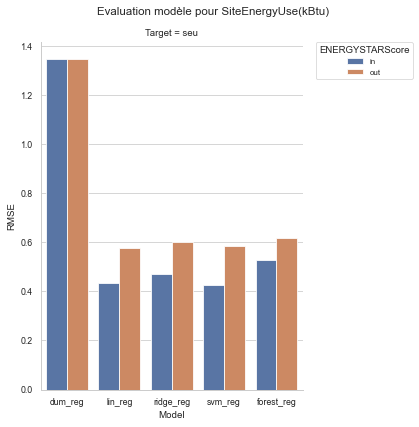

In [252]:
import seaborn as sns

# graphique pour la variable SiteEnergyUse(kBtu)
g = sns.catplot(x="Model", y="RMSE",
                hue="ESS_status", col="Target",
                data=base_results.loc[base_results['Target']=='seu'],
                kind="bar",
                height=6, aspect=1,
                legend=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Evaluation modèle pour SiteEnergyUse(kBtu)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,\
          title="ENERGYSTARScore", fontsize='small', fancybox=True)

# scaling automatique ('paper', 'talk', 'poster', 'notebook')
sns.set_context("paper")
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()


In [253]:
base_results.loc[base_results['Target']=='emi']

,Model,Target,ESS_status,RMSE,exp_RMSE,MAE
5,dum_reg,emi,in,1.450445,4.265013,1.146912
6,lin_reg,emi,in,0.417568,4.265013,0.295926
7,ridge_reg,emi,in,0.454760,1.575795,0.295775
8,svm_reg,emi,in,0.388225,1.474362,0.193024
9,forest_reg,emi,in,0.532721,1.703561,0.135209
15,dum_reg,emi,out,1.450445,4.265013,1.146912
16,lin_reg,emi,out,0.541826,4.265013,0.405024
17,ridge_reg,emi,out,0.571880,1.771595,0.404391
18,svm_reg,emi,out,0.540204,1.716357,0.315910
19,forest_reg,emi,out,0.603800,1.829056,0.162082


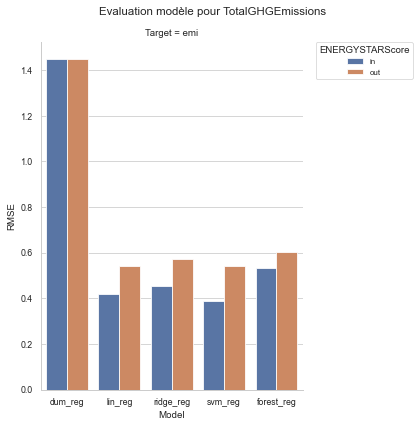

In [254]:
# graphique pour la variable TotalGHGEmissions
g = sns.catplot(x="Model", y="RMSE",
                hue="ESS_status", col="Target",
                data=base_results.loc[base_results['Target']=='emi'],
                kind="bar",
                height=6, aspect=1,
                legend=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Evaluation modèle pour TotalGHGEmissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,\
          title="ENERGYSTARScore", fontsize='small', fancybox=True)

# scaling automatique ('paper', 'talk', 'poster', 'notebook')
sns.set_context("paper")
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()


## 5.5 | Comparaison de l'erreur MAE des modèles

In [255]:
base_results.loc[base_results['Target']=='seu']

,Model,Target,ESS_status,RMSE,exp_RMSE,MAE
0,dum_reg,seu,in,1.348073,3.850000,1.069849
1,lin_reg,seu,in,0.435665,1.545991,0.297497
2,ridge_reg,seu,in,0.469451,1.599115,0.297351
3,svm_reg,seu,in,0.424647,1.529050,0.210450
4,forest_reg,seu,in,0.526426,1.692871,0.129463
10,dum_reg,seu,out,1.348073,3.850000,1.069849
11,lin_reg,seu,out,0.575047,1.777214,0.421443
12,ridge_reg,seu,out,0.602412,1.826520,0.420587
13,svm_reg,seu,out,0.586461,1.797616,0.341876
14,forest_reg,seu,out,0.615310,1.850231,0.160240


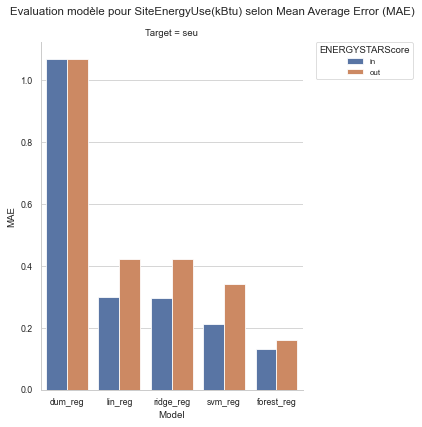

In [256]:
import seaborn as sns

# graphique pour la variable SiteEnergyUse(kBtu)
g = sns.catplot(x="Model", y="MAE",
                hue="ESS_status", col="Target",
                data=base_results.loc[base_results['Target']=='seu'],
                kind="bar",
                height=6, aspect=1,
                legend=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Evaluation modèle pour SiteEnergyUse(kBtu) selon Mean Average Error (MAE)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,\
          title="ENERGYSTARScore", fontsize='small', fancybox=True)

# scaling automatique ('paper', 'talk', 'poster', 'notebook')
sns.set_context("paper")
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()


In [257]:
base_results.loc[base_results['Target']=='emi']

,Model,Target,ESS_status,RMSE,exp_RMSE,MAE
5,dum_reg,emi,in,1.450445,4.265013,1.146912
6,lin_reg,emi,in,0.417568,4.265013,0.295926
7,ridge_reg,emi,in,0.454760,1.575795,0.295775
8,svm_reg,emi,in,0.388225,1.474362,0.193024
9,forest_reg,emi,in,0.532721,1.703561,0.135209
15,dum_reg,emi,out,1.450445,4.265013,1.146912
16,lin_reg,emi,out,0.541826,4.265013,0.405024
17,ridge_reg,emi,out,0.571880,1.771595,0.404391
18,svm_reg,emi,out,0.540204,1.716357,0.315910
19,forest_reg,emi,out,0.603800,1.829056,0.162082


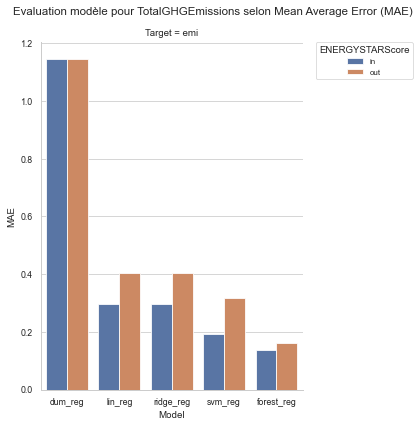

In [258]:
# graphique pour la variable TotalGHGEmissions
g = sns.catplot(x="Model", y="MAE",
                hue="ESS_status", col="Target",
                data=base_results.loc[base_results['Target']=='emi'],
                kind="bar",
                height=6, aspect=1,
                legend=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Evaluation modèle pour TotalGHGEmissions selon Mean Average Error (MAE)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,\
          title="ENERGYSTARScore", fontsize='small', fancybox=True)

# scaling automatique ('paper', 'talk', 'poster', 'notebook')
sns.set_context("paper")
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()


## 5.6 | Evaluation du meilleur modèle sur le jeu de données test

Nous avons utilisé jusqu'ici 2 critères différents de mesure de l'erreur pour départager les modèles, choisissons maintenant celui adapté à notre situation.

**MAE :** c'est la moyenne sur l'échantillon de la valeur absolue de l'écart entre la prédiction et les observations. Toutes les différences entre les individus ont le même poids.

**RMSE :** c'est la racine carrée de la moyenne des écarts au carré entre la prédiction et les observations.

**Similarités :**<br>
-  la MAE et la RMSE expriment l'erreur de prédiction du modèle dans l'unité de la variable cible.
-  les deux métriques peuvent aller de 0 à l'infini
-  elles sont indifférentes au sens de l'erreur
-  ce sont des scores orientés négativement, c'est à dire que les valeurs basses sont meilleures.

**Différences :**<br>
Pour la RMSE, la **mise au carré** avant de prendre la racine carrée donne un **poids relativement plus élevé aux grandes erreurs**. Cette mesure doit donc être utilisée plutôt lorsque des erreurs grandes doivent être particulièrement évitées et donc pénalisées.

**Conclusion : nous choisissons la MAE**
Dans notre cas, avoir un écart final de 10 c'est juste 2 fois plus mauvais que d'avoir un écart de 5, mais pas plus.<br>
**La MAE est donc appropriée**, et pas la RMSE, qui aurait tendance à juger que c'est plus que 2 fois plus mauvais. 

Le meilleur modèle selon le critère de l'erreur moyenne est le **Random Forest** : celui-ci présente en effet la **plus petite erreur MAE** avec ou sans  EnergyStarScore pour les 2 prédictions, consommation ou émission.

Nous allons maintenant **évaluer ces modèles sur le jeu de test** pour vérifier leur performance sur des données inconnues.<br>

Le modèle **Random Forest** en particulier ne devrait pas être trop sensible à l'overfitting de manière général de par le fait qu'il utilise lui aussi uniquement une partie des données pour construire chaque arbre de décision avant de moyenner les retours.<br>

Vérifions si nous constatons dans les chiffres cette hypothèse.

### 5.6.1 | Evaluation sur jeu de données test

Nous allons pour cela **récupérer les prédicateurs et les étiquettes de notre jeu de test**, lancer notre **pipeline pour transformer les données** (en appelant transform et non pas fit_transform, pour ne pas entrainer le modèle sur le jeu de test), et **évaluer le modèle final** sur le jeu de test.

Mettons en forme les données du jeu de test via le Pipeline et transformons-les grâce au modèle pour obtenir les prédictions :

In [259]:
# corrigeons la liste des attributs X_num
# qui ne devrait pas contenir
# 'PropertyGFABuilding_per_floor' qui s'est révélé mauvais 
# ni les variables à prédire, à traiter à part au besoin
X_num = [item for item in data.columns if item not in [
    'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
    'PropertyGFABuilding_per_floor']]

In [260]:
X_num = [item for item in data.columns if item not in [
    'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
    'PropertyGFABuilding_per_floor']]

num_attribs = X_num

# num_pipeline = Pipeline([('imputer', SimpleImputer(strategy ="median")),
#                          ('std_scaler', StandardScaler()),
#                         ])

# # cat_attribs = data_cat
# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs)
# ])

In [261]:
# lançons le pipeline pour chaque modèle x jeu de données x feature à prédire
print('evaluation vs test_set')
print('model | RMSE | exp(RMSE) | MAE')
print('_'*30)

X_test = strat_test_set.drop(["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log"], axis = 1)
y_test = strat_test_set[["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log"]].copy()
# X_prepared_test = full_pipeline.fit_transform(X_test)
X_prepared_rfo_test = full_pipeline_rfo.transform(X_test)

# modèle best_reg_seu (RandomForest):
final_predictions_seu = best_reg_seu.predict(X_prepared_rfo_test)
final_rmse1 = mean_squared_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu, squared = False)
final_mae1 = mean_absolute_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu)
print('\n')
print(best_reg_seu)
print('best_reg_seu',' | ',round(final_rmse1,2),' | ',round(exp(final_rmse1),2),' | ',round(final_mae1,2))
print('-'*20)

# modèle best_reg_emi (RandomForest):
final_predictions_emi = best_reg_emi.predict(X_prepared_rfo_test)
final_rmse3 = mean_squared_error(y_test['TotalGHGEmissions_log'], final_predictions_emi, squared = False)
final_mae3 = mean_absolute_error(y_test['TotalGHGEmissions_log'], final_predictions_emi)
print(best_reg_emi)
print('best_reg_emi',' | ',round(final_rmse3,2),' | ',round(exp(final_rmse3),2),' | ',round(final_mae3,2))
print('-'*20)


# Le meilleur modèle sans EnergyStarScore étant Random Forest, nous devons retraiter à nouveau 
# les données test sans EnergyStarScore, 
# et les préparer sans le Standard Scaler, via le full_pipeline_rfo_wo_ess
# On modifie le jeu de données pour supprimer "ENERGYSTARScore" et appliquer à nouveau sur le jeu de test
X_test = strat_test_set.drop(["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log", "ENERGYSTARScore"], axis = 1)
X_prepared_rfo_test = full_pipeline_rfo_wo_ess.transform(X_test)

# modèle best_reg_seu_wo_ess (RandomForest):
final_predictions_seu_wo_ess = best_reg_seu_wo_ess.predict(X_prepared_rfo_test)
final_rmse2 = mean_squared_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu_wo_ess, squared = False)
final_mae2 = mean_absolute_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu_wo_ess)
rel_gap_perc1 = round((final_mae2 - final_mae1)/final_mae1 * 100,2)
print(best_reg_seu_wo_ess)
print('best_reg_seu_wo_ess',' | ',round(final_rmse2,2),' | ',round(exp(final_rmse2),2),' | ',round(final_mae2,2))
print('-'*20)

# modèle best_reg_emi_wo_ess (RandomForest):
final_predictions_emi_wo_ess = best_reg_emi_wo_ess.predict(X_prepared_rfo_test)
final_rmse4 = mean_squared_error(y_test['TotalGHGEmissions_log'], final_predictions_emi_wo_ess, squared = False)
final_mae4 = mean_absolute_error(y_test['TotalGHGEmissions_log'], final_predictions_emi_wo_ess)
rel_gap_perc2 = round((final_mae4 - final_mae3)/final_mae3 * 100,2)
print(best_reg_emi_wo_ess)
print('best_reg_emi_wo_ess',' | ',round(final_rmse4,2),' | ',round(exp(final_rmse4),2),' | ',round(final_mae4,2))
print('-'*20)
print('\n')
print('relative mae gap percentage | seu : ', rel_gap_perc1)
print('relative mae gap percentage | emi : ', rel_gap_perc2)

evaluation vs test_set
model | RMSE | exp(RMSE) | MAE
______________________________


RandomForestRegressor(max_features=0.5, n_estimators=1000,
                      random_state=20220519)
best_reg_seu  |  0.51  |  1.66  |  0.34
--------------------
RandomForestRegressor(max_features=0.8, n_estimators=1000,
                      random_state=20220519)
best_reg_emi  |  0.51  |  1.67  |  0.36
--------------------
RandomForestRegressor(max_features=0.2, n_estimators=1000,
                      random_state=20220519)
best_reg_seu_wo_ess  |  0.65  |  1.91  |  0.46
--------------------
RandomForestRegressor(max_features=0.2, n_estimators=1000,
                      random_state=20220519)
best_reg_emi_wo_ess  |  0.62  |  1.87  |  0.46
--------------------


relative mae gap percentage | seu :  35.28
relative mae gap percentage | emi :  26.81


Suite à cette analyse on peut conclure que **les résultats obtenus pendant la validation croisée** sont sensiblement les **mêmes** que ceux issus de la **base de test**, ce qui montre que la **sélection des hyper-paramètres est légitime**.<br>

Les modèles performent tout aussi bien sur des données inconnues.

Ceci est dû au fait que le modèle **RandomForest** est assez peu sensible à l'échantillonnage de par sa méthodologie d'entrainement réalisé sur une partie seulement du jeu d'entrainement pour chaque arbre.

La **MAE est au final très proche de celle constatée durant l'entrainement**:

-  best_reg_seu  |  0.34 contre 0.13 avec le train set
-  best_reg_emi  |  0.36 contre 0.13 avec le train set
-  best_reg_seu_wo_ess  |  0.46 contre 0.16 avec le train set
-  best_reg_emi_wo_ess  |  0.46 contre 0.16 avec le train set

Nous arrivons au bout de ce projet, nous allons maintenant préparer : 
-  la présentation de notre démarche et solution (en mettant en avant ce que nous avons appris, ce qui a fonctionné et ce qui ne l'a pas fait, quelles hypothèses ont été prises,et les limites de notre système),
-  la documentation, et 
-  créer une présentation avec des visuels clairs et des assertions faciles à retenir (e.g., “la median income is the number one predictor of housing prices”).

Dans cette **analyse de la prévision de consommation d'énergie et d'émission de gaz à effet de serre**, la **performance finale** du système est **dégradée d'environ 8 à 10% sans l'ENERGYSTARSCORE selon l'indicateur à prédire**, mais cela pourrait toujours être une **bonne idée d'utiliser le modèle sans l'ENERGYSTARScore**, surtout si cela **libère des ressources et un du temps aux experts** afin qu'ils puissent travailler sur des tâches plus intéressantes et productives que la production de l'ENERGYSTARScore.

### 5.6.2 | Visualisation de l'erreur d'entrainement des modèles selon l'estimation de probabilité kernel density estimation (KDE) - synthèse RMSE & MAE

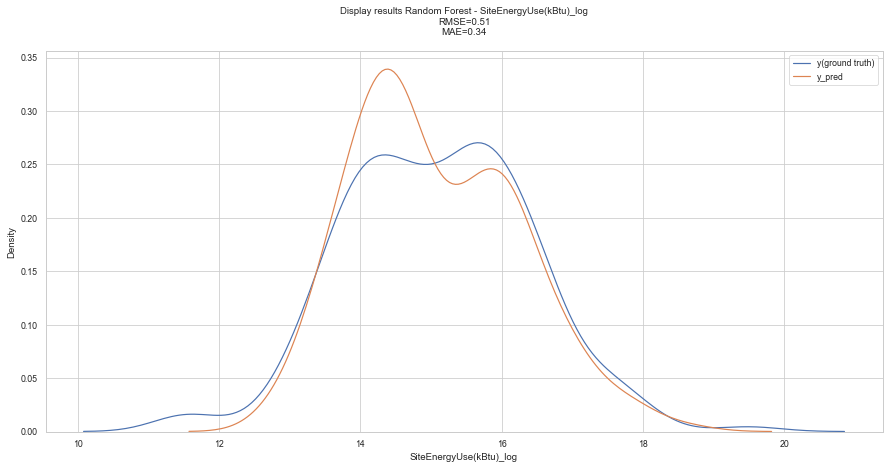

In [262]:
# pour SiteEnergyUse(kBtu)_log
title = "Display results Random Forest - SiteEnergyUse(kBtu)_log"
plt.figure(figsize=(15,7))
sns.kdeplot(y_test['SiteEnergyUse(kBtu)_log'], label='y(ground truth)')
sns.kdeplot(final_predictions_seu, label='y_pred')
plt.title(f"""{title}
RMSE={round(mean_squared_error(y_test['SiteEnergyUse(kBtu)_log'],final_predictions_seu, squared=False),2)}
MAE={round(mean_absolute_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu),2)}
""")
plt.legend()

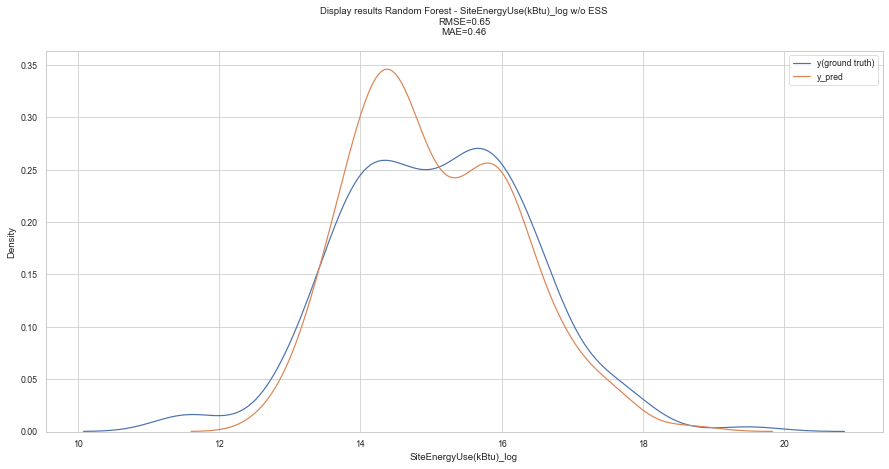

In [263]:
# pour SiteEnergyUse(kBtu)_log w/o ESS
title = "Display results Random Forest - SiteEnergyUse(kBtu)_log w/o ESS"
plt.figure(figsize=(15,7))
sns.kdeplot(y_test['SiteEnergyUse(kBtu)_log'], label='y(ground truth)')
sns.kdeplot(final_predictions_seu_wo_ess, label='y_pred')
plt.title(f"""{title}
RMSE={round(mean_squared_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu_wo_ess, squared=False),2)}
MAE={round(mean_absolute_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_seu_wo_ess),2)}
""")
plt.legend()

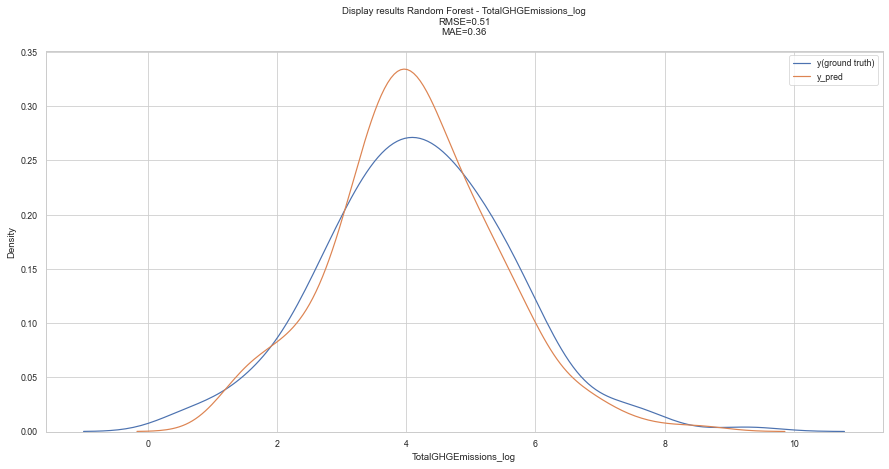

In [264]:
# pour TotalGHGEmissions_log
title = "Display results Random Forest - TotalGHGEmissions_log"
plt.figure(figsize=(15,7))
sns.kdeplot(y_test['TotalGHGEmissions_log'], label='y(ground truth)')
sns.kdeplot(final_predictions_emi, label='y_pred')
plt.title(f"""{title}
RMSE={round(mean_squared_error(y_test['TotalGHGEmissions_log'], final_predictions_emi, squared=False),2)}
MAE={round(mean_absolute_error(y_test['TotalGHGEmissions_log'], final_predictions_emi),2)}
""")
plt.legend()

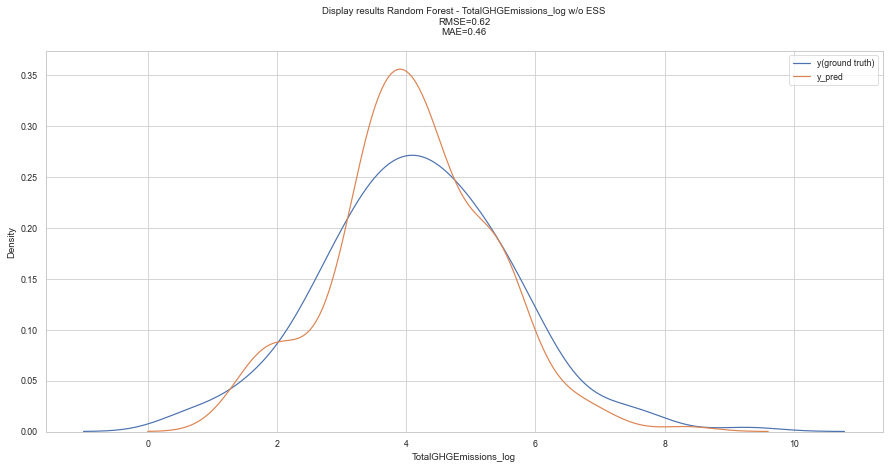

In [265]:
# pour TotalGHGEmissions_log w/o ESS
title = "Display results Random Forest - TotalGHGEmissions_log w/o ESS"
plt.figure(figsize=(15,7))
sns.kdeplot(y_test['TotalGHGEmissions_log'], label='y(ground truth)')
sns.kdeplot(final_predictions_emi_wo_ess, label='y_pred')
plt.title(f"""{title}
RMSE={round(mean_squared_error(y_test['TotalGHGEmissions_log'], final_predictions_emi_wo_ess, squared=False),2)}
MAE={round(mean_absolute_error(y_test['TotalGHGEmissions_log'], final_predictions_emi_wo_ess),2)}
""")
plt.legend()

On peut constater le même type de comportement des deux prédictions pour les configurations avec ou sans ESS :
-  on **underfit plus ou moins la réalité** (courbe plus ou moins éloignée de la vérité)
-  on observe une **forme** de distribution **différente**
-  les **modes** diffèrent (légèrement) entre prédiction et réalité<br>

De manière générale :
-  on est plutôt **optimiste** sur les **petites valeurs**, 
-  autour de la **moyenne** on **surestime**,
-  on est à nouveau **optimiste** sur les **grandes valeurs**.

Pour remédier à cela et améliorer la précision du modèle, il faudrait probablement effectuer un travail encore plus précis en amont sur les données / features ainsi que sur les modèles :
-  qualité des données, représentativité de l'échantillon d'étude
-  soin apporté à leur préparation et à leur sélection
-  rééchantillonnage et agrégation de modèles (partition en classes)

### 5.6.4 | Evaluation RMSE sur le jeu de données initial (avec les nan sur ENERGYSTARScore)

Nous allons pour cela **récupérer les prédicateurs et les étiquettes de notre total** sans la variable ENERGYSTARScore, lancer notre **pipeline pour transformer les données pour le modèle RandomForest** (en appelant transform et non pas fit_transform, pour ne pas entrainer le modèle sur ce jeu de données total), et **tester notre modèle Random Forest** sur le jeu de données.

In [266]:
# on vérifie que notre backup contient bien toutes les données
data_bkp.shape

(1548, 35)

In [267]:
# on reprend l'ensemble des données initialement chargées
data = data_bkp

# corrigeons la liste des attributs X_num
# qui ne devrait pas contenir'YearBuilt' ni 'ZipCode'
# ni "ENERGYSTARScore" que l'on vient de retirer
# ni 'PropertyGFABuilding_per_floor' qui s'est révélé mauvais 
# ni les variables à prédire, à traiter à part au besoin
items_to_remove = ['YearBuilt', 'ZipCode', 'ENERGYSTARScore','SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
    'PropertyGFABuilding_per_floor']
X_num = [item for item in data.columns if item not in items_to_remove]
num_attribs = X_num

In [268]:
# lançons le pipeline pour chaque modèle x jeu de données x feature à prédire
print('model | RMSE | exp(RMSE)')
print('-'*30)

# On modifie le jeu de données pour supprimer "ENERGYSTARScore" et appliquer à nouveau sur le jeu total
X = data.drop(["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log", "ENERGYSTARScore"], axis = 1)
X_prepared_rfo_total = full_pipeline_rfo_wo_ess.transform(X)
y_test = data[["SiteEnergyUse(kBtu)_log", "TotalGHGEmissions_log"]].copy()

# modèle best_reg_seu_wo_ess :
final_predictions_total = best_reg_seu_wo_ess.predict(X_prepared_rfo_total)
final_rmse = mean_squared_error(y_test['SiteEnergyUse(kBtu)_log'], final_predictions_total, squared = False)
print('best_reg_seu_wo_ess',' | ',round(final_rmse,2),' | ',round(exp(final_rmse),2))

# modèle best_reg_emi_wo_ess :
final_predictions_total = best_reg_emi_wo_ess.predict(X_prepared_rfo_total)
final_rmse = mean_squared_error(y_test['TotalGHGEmissions_log'], final_predictions_total, squared = False)
print('best_reg_emi_wo_ess',' | ',round(final_rmse,2),' | ',round(exp(final_rmse),2))

model | RMSE | exp(RMSE)
------------------------------
best_reg_seu_wo_ess  |  0.72  |  2.05
best_reg_emi_wo_ess  |  0.59  |  1.81


En appliquant le modèle Random Forest **sans les données ENERGYSTARScore**, l'**erreur quadratique RMSE sur l'ensemble du jeu** de données est de **0.72 pour la consommation d'énergie** et de de **0.59 pour l'émission de gaz à effet de serre**.